In [1]:
#pip install mlxtend

In [2]:
#pip install scikit-learn-extra

In [3]:
#pip install imbalanced-learn

In [4]:
#pip install threadpoolctl

In [5]:
# importing the needed libraries
import sqlite3
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as py
from mlxtend.frequent_patterns import apriori, association_rules 
from sklearn.cluster import DBSCAN

In [6]:
# Loading the database
con = sqlite3.connect("accident_data_v1.0.0_2023.db")

In [7]:
cur = con.cursor()

In [8]:
# Fetch all table names from the database
cur.execute("SELECT name FROM sqlite_master WHERE type='table'")
tables = cur.fetchall()

# Print the table names
for table in tables:
    print(table)


('accident',)
('casualty',)
('vehicle',)
('lsoa',)


In [9]:
col_info = cur.execute(f"PRAGMA table_info(accident)")

In [10]:
accident_info = col_info.fetchall()

In [11]:
accident_info

[(0, 'accident_index', '', 0, None, 1),
 (1, 'accident_year', '', 0, None, 0),
 (2, 'accident_reference', '', 0, None, 0),
 (3, 'location_easting_osgr', '', 0, None, 0),
 (4, 'location_northing_osgr', '', 0, None, 0),
 (5, 'longitude', '', 0, None, 0),
 (6, 'latitude', '', 0, None, 0),
 (7, 'police_force', '', 0, None, 0),
 (8, 'accident_severity', '', 0, None, 0),
 (9, 'number_of_vehicles', '', 0, None, 0),
 (10, 'number_of_casualties', '', 0, None, 0),
 (11, 'date', '', 0, None, 0),
 (12, 'day_of_week', '', 0, None, 0),
 (13, 'time', '', 0, None, 0),
 (14, 'local_authority_district', '', 0, None, 0),
 (15, 'local_authority_ons_district', '', 0, None, 0),
 (16, 'local_authority_highway', '', 0, None, 0),
 (17, 'first_road_class', '', 0, None, 0),
 (18, 'first_road_number', '', 0, None, 0),
 (19, 'road_type', '', 0, None, 0),
 (20, 'speed_limit', '', 0, None, 0),
 (21, 'junction_detail', '', 0, None, 0),
 (22, 'junction_control', '', 0, None, 0),
 (23, 'second_road_class', '', 0, None,

In [12]:
res = cur.execute("SELECT  COUNT (*) FROM accident")
res.fetchall()

[(461352,)]

In [13]:
res = cur.execute("SELECT  COUNT (*) FROM vehicle")
res.fetchall()

[(849091,)]

In [14]:
res = cur.execute("SELECT  COUNT (*) FROM casualty")
res.fetchall()

[(600332,)]

In [15]:
res = cur.execute("SELECT  COUNT (*) FROM lsoa")
res.fetchall()

[(34378,)]

In [16]:
res = cur.execute("SELECT  COUNT (*) FROM accident WHERE accident_year = 2020")
res.fetchall()

[(91199,)]

In [17]:
res = cur.execute("SELECT * FROM accident WHERE accident_year = 2020 ")
res.fetchall()

[('2020010219808',
  2020,
  '010219808',
  521389.0,
  175144.0,
  -0.254001,
  51.462262,
  1,
  3,
  1,
  1,
  '04/02/2020',
  3,
  '09:00',
  10,
  'E09000032',
  'E09000032',
  6,
  0,
  6,
  20,
  0,
  -1,
  0,
  -1,
  9,
  9,
  1,
  9,
  9,
  0,
  0,
  1,
  3,
  2,
  'E01004576'),
 ('2020010220496',
  2020,
  '010220496',
  529337.0,
  176237.0,
  -0.139253,
  51.470327,
  1,
  3,
  1,
  2,
  '27/04/2020',
  2,
  '13:55',
  9,
  'E09000022',
  'E09000022',
  3,
  3036,
  6,
  20,
  9,
  2,
  6,
  0,
  0,
  4,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  2,
  'E01003034'),
 ('2020010228005',
  2020,
  '010228005',
  526432.0,
  182761.0,
  -0.178719,
  51.529614,
  1,
  3,
  1,
  1,
  '01/01/2020',
  4,
  '01:25',
  1,
  'E09000033',
  'E09000033',
  5,
  0,
  6,
  30,
  3,
  1,
  6,
  0,
  0,
  0,
  4,
  1,
  2,
  0,
  0,
  1,
  1,
  2,
  'E01004726'),
 ('2020010228006',
  2020,
  '010228006',
  538676.0,
  184371.0,
  -0.001683,
  51.54121,
  1,
  2,
  1,
  1,
  '01/01/2020',
  4,
  '0

In [18]:
# To display the entire dataframe
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)

In [19]:
# Changing the accident table into a dataframe for the year 2020
query = "SELECT * FROM accident WHERE accident_year = 2020" 
df = pd.read_sql_query(query, con)

In [20]:
df

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2020010219808,2020,010219808,521389.0,175144.0,-0.254001,51.462262,1,3,1,...,9,1,9,9,0,0,1,3,2,E01004576
1,2020010220496,2020,010220496,529337.0,176237.0,-0.139253,51.470327,1,3,1,...,4,1,1,1,0,0,1,1,2,E01003034
2,2020010228005,2020,010228005,526432.0,182761.0,-0.178719,51.529614,1,3,1,...,0,4,1,2,0,0,1,1,2,E01004726
3,2020010228006,2020,010228006,538676.0,184371.0,-0.001683,51.541210,1,2,1,...,4,4,1,1,0,0,1,1,2,E01003617
4,2020010228011,2020,010228011,529324.0,181286.0,-0.137592,51.515704,1,3,1,...,0,4,1,1,0,0,1,1,2,E01004763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91194,2020991027064,2020,991027064,343034.0,731654.0,-2.926320,56.473539,99,2,2,...,0,1,1,1,0,0,1,1,-1,-1
91195,2020991029573,2020,991029573,257963.0,658891.0,-4.267565,55.802353,99,3,1,...,0,1,1,1,0,0,1,2,-1,-1
91196,2020991030297,2020,991030297,383664.0,810646.0,-2.271903,57.186317,99,2,2,...,0,1,1,1,0,0,2,1,-1,-1
91197,2020991030900,2020,991030900,277161.0,674852.0,-3.968753,55.950940,99,3,2,...,0,1,1,1,0,0,1,2,-1,-1


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91199 entries, 0 to 91198
Data columns (total 36 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   accident_index                               91199 non-null  object 
 1   accident_year                                91199 non-null  int64  
 2   accident_reference                           91199 non-null  object 
 3   location_easting_osgr                        91185 non-null  float64
 4   location_northing_osgr                       91185 non-null  float64
 5   longitude                                    91185 non-null  float64
 6   latitude                                     91185 non-null  float64
 7   police_force                                 91199 non-null  int64  
 8   accident_severity                            91199 non-null  int64  
 9   number_of_vehicles                           91199 non-null  int64  
 10

### Data Cleaning accident table

In [22]:
df.isnull().sum()

accident_index                                  0
accident_year                                   0
accident_reference                              0
location_easting_osgr                          14
location_northing_osgr                         14
longitude                                      14
latitude                                       14
police_force                                    0
accident_severity                               0
number_of_vehicles                              0
number_of_casualties                            0
date                                            0
day_of_week                                     0
time                                            0
local_authority_district                        0
local_authority_ons_district                    0
local_authority_highway                         0
first_road_class                                0
first_road_number                               0
road_type                                       0


In [23]:
# Funtion to check the unique values and value counts in each column
def check_unique_and_value_counts(dataframe, column_name):
    unique_values = dataframe[column_name].unique()
    value_counts = dataframe[column_name].value_counts()
    return unique_values, value_counts

### location_easting_osgr

In [24]:
# The mean, median, and mode for location_easting_osgr
df['location_easting_osgr'].mean(), df['location_easting_osgr'].median(), df['location_easting_osgr'].mode()[0]

(456487.8764160772, 465545.0, 531949.0)

In [25]:
unique_vals, value_counts = check_unique_and_value_counts(df, 'location_easting_osgr')
print("Unique values:", unique_vals)
print("Value counts:\n", value_counts)

Unique values: [521389. 529337. 526432. ... 383664. 277161. 240402.]
Value counts:
 534246.0    8
531949.0    8
533808.0    7
534060.0    7
527086.0    7
           ..
437554.0    1
453879.0    1
434568.0    1
436835.0    1
240402.0    1
Name: location_easting_osgr, Length: 75403, dtype: int64


### location_northing_osgr

In [26]:
unique_vals, value_counts = check_unique_and_value_counts(df, 'location_northing_osgr')
print("Unique values:", unique_vals)
print("Value counts:\n", value_counts)

Unique values: [175144. 176237. 182761. ... 810646. 674852. 681950.]
Value counts:
 182843.0    9
183562.0    8
185193.0    7
183119.0    7
181602.0    7
           ..
512482.0    1
511421.0    1
508495.0    1
512029.0    1
681950.0    1
Name: location_northing_osgr, Length: 75498, dtype: int64


In [27]:
df.sort_values(by='local_authority_district', inplace=True)
# creating a mask for rows with missing location easting osgr and location northing osgr
mask_missing = df['location_easting_osgr'].isnull() & df['location_northing_osgr'].isnull()
# Iterating through the rows with missing values
for index, row in df[mask_missing].iterrows():
# Finding the adjacent rows with the same local authority district
    adjacent_rows = df[(df['local_authority_district'] == row['local_authority_district']) &
                       ~df['location_easting_osgr'].isnull() & ~df['location_northing_osgr'].isnull()]
    
    if not adjacent_rows.empty:
        imputed_easting = adjacent_rows.iloc[0]['location_easting_osgr']
        imputed_northing = adjacent_rows.iloc[0]['location_northing_osgr']
        
# Updating the missing values in the current row
        df.at[index, 'location_easting_osgr'] = imputed_easting
        df.at[index, 'location_northing_osgr'] = imputed_northing

### longitude

In [28]:
df['longitude'].mean(), df['longitude'].median(), df['longitude'].mode()[0]

(-1.1892579453089804, -1.046912, -1.893843)

In [29]:
unique_vals, value_counts = check_unique_and_value_counts(df, 'longitude')
print("Unique values:", unique_vals)
print("Value counts:\n", value_counts)

Unique values: [-1.847488 -2.275834 -3.642041 ... -6.389423 -6.498804 -7.306162]
Value counts:
 -1.549110    4
-1.893843    4
-0.071890    4
-1.311069    3
-5.295693    3
            ..
-1.551636    1
-1.822666    1
-1.518623    1
-1.897253    1
-7.306162    1
Name: longitude, Length: 89589, dtype: int64


### latitude

In [30]:
df['latitude'].mean(), df['latitude'].median(), df['latitude'].mode()[0]

(52.3510732005589, 51.763385, 51.522078)

In [31]:
unique_vals, value_counts = check_unique_and_value_counts(df, 'latitude')
print("Unique values:", unique_vals)
print("Value counts:\n", value_counts)

Unique values: [52.47871  51.262472 51.20432  ... 58.228871 58.155139 57.48201 ]
Value counts:
 51.550843    4
51.541779    4
51.522078    4
53.799708    4
51.635749    3
            ..
54.974158    1
54.969443    1
55.022155    1
55.007138    1
57.482010    1
Name: latitude, Length: 88748, dtype: int64


In [32]:
df['latitude'].unique()

array([52.47871 , 51.262472, 51.20432 , ..., 58.228871, 58.155139,
       57.48201 ])

In [33]:
# Imputation of the missing longitude and latitude values using the local authority district as a look up table
df.sort_values(by='local_authority_district', inplace=True)
# creating a mask for rows with missing longitude and latitude
mask_missing = df['longitude'].isnull() & df['latitude'].isnull()
# Iterating through the rows with missing values
for index, row in df[mask_missing].iterrows():
# Finding the adjacent rows with the same local authority district value
    adjacent_rows = df[(df['local_authority_district'] == row['local_authority_district']) &
                       ~df['longitude'].isnull() & ~df['latitude'].isnull()]
    
    if not adjacent_rows.empty:
# Using the value from the adjacent rows
        imputed_longitude = adjacent_rows.iloc[0]['longitude']
        imputed_latitude = adjacent_rows.iloc[0]['latitude']
        
# Updating the missing value
        df.at[index, 'longitude'] = imputed_longitude
        df.at[index, 'latitude'] = imputed_latitude

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91199 entries, 42738 to 87793
Data columns (total 36 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   accident_index                               91199 non-null  object 
 1   accident_year                                91199 non-null  int64  
 2   accident_reference                           91199 non-null  object 
 3   location_easting_osgr                        91199 non-null  float64
 4   location_northing_osgr                       91199 non-null  float64
 5   longitude                                    91199 non-null  float64
 6   latitude                                     91199 non-null  float64
 7   police_force                                 91199 non-null  int64  
 8   accident_severity                            91199 non-null  int64  
 9   number_of_vehicles                           91199 non-null  int64  

### police_ force

In [35]:
unique_vals, value_counts = check_unique_and_value_counts(df, 'police_force')
print("Unique values:", unique_vals)
print("Value counts:\n", value_counts)

Unique values: [20 37 62 54 34 35 21 22 23 31 33 41 52 48 47 44 43 42 61 63  6  7 11 13
 14  1  5 45  3  4 10 12 16 17 30 32 36 40 46 50 53 55 60 99]
Value counts:
 1     20906
20     3933
99     3836
46     3405
47     3107
44     3016
43     2767
13     2764
50     2616
42     2536
6      2399
4      2354
45     2334
52     2044
14     2021
5      1717
16     1709
10     1690
31     1677
30     1462
22     1446
41     1398
32     1396
7      1363
36     1324
35     1246
12     1180
55     1158
33     1133
40     1084
37      995
54      961
62      958
34      886
21      879
23      855
63      771
3       755
53      695
60      658
11      601
17      570
61      487
48      107
Name: police_force, dtype: int64


### accident_severity

In [36]:
unique_vals, value_counts = check_unique_and_value_counts(df, 'accident_severity')
print("Unique values:", unique_vals)
print("Value counts:\n", value_counts)

Unique values: [2 3 1]
Value counts:
 3    71453
2    18355
1     1391
Name: accident_severity, dtype: int64


### number_of_vehicles

In [37]:
unique_vals, value_counts = check_unique_and_value_counts(df, 'number_of_vehicles')
print("Unique values:", unique_vals)
print("Value counts:\n", value_counts)

Unique values: [ 1  2  3  4  7  8  5  6  9 10 11 13 12]
Value counts:
 2     57392
1     25730
3      6241
4      1334
5       331
6        99
7        47
8        15
9         3
10        3
11        2
13        1
12        1
Name: number_of_vehicles, dtype: int64


### number_of_casualties

In [38]:
unique_vals, value_counts = check_unique_and_value_counts(df, 'number_of_casualties')
print("Unique values:", unique_vals)
print("Value counts:\n", value_counts)

Unique values: [ 1  3  2  6  5  4  8  7 11  9 10 17 41 13 12 19]
Value counts:
 1     74161
2     12221
3      3214
4      1063
5       349
6       115
7        43
8        14
9         7
11        4
10        3
17        1
41        1
13        1
12        1
19        1
Name: number_of_casualties, dtype: int64


### date

In [39]:
unique_vals, value_counts = check_unique_and_value_counts(df, 'date')
print("Unique values:", unique_vals)
print("Value counts:\n", value_counts)

Unique values: ['12/07/2020' '23/06/2020' '03/07/2020' '05/07/2020' '25/06/2020'
 '06/07/2020' '07/07/2020' '22/06/2020' '02/07/2020' '13/06/2020'
 '26/06/2020' '07/02/2020' '11/07/2020' '04/07/2020' '12/06/2020'
 '21/06/2020' '07/06/2020' '08/07/2020' '24/07/2020' '17/07/2020'
 '14/07/2020' '01/07/2020' '15/07/2020' '24/06/2020' '08/06/2020'
 '12/03/2020' '13/03/2020' '15/03/2020' '18/03/2020' '16/03/2020'
 '22/03/2020' '13/02/2020' '23/05/2020' '20/03/2020' '03/03/2020'
 '11/03/2020' '19/02/2020' '30/03/2020' '02/04/2020' '14/04/2020'
 '12/04/2020' '23/04/2020' '20/04/2020' '21/04/2020' '24/04/2020'
 '05/04/2020' '02/01/2020' '28/05/2020' '29/05/2020' '17/03/2020'
 '06/03/2020' '05/03/2020' '24/01/2020' '30/01/2020' '02/02/2020'
 '08/02/2020' '08/01/2020' '14/02/2020' '12/02/2020' '11/02/2020'
 '15/01/2020' '29/01/2020' '22/02/2020' '16/01/2020' '26/02/2020'
 '28/02/2020' '18/01/2020' '27/02/2020' '25/02/2020' '16/06/2020'
 '01/06/2020' '27/05/2020' '18/04/2020' '02/06/2020' '03/06/2

In [40]:
# Changing the type of the column date from object to date
df["date"] = df["date"].astype("datetime64")

C:\Users\Amro\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '23/06/2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Amro\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '25/06/2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Amro\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '22/06/2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Amro\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '13/06/2020' in DD/MM/YYYY format. Provide format or specify in

<AxesSubplot:xlabel='date,date'>

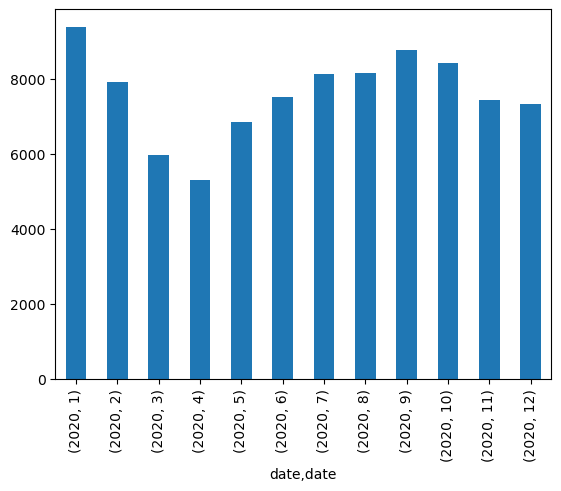

In [41]:
df.groupby([df["date"].dt.year, df["date"].dt.month]).size().plot(kind="bar")

### day_of_week

In [42]:
df['day_of_week'].unique()

array([1, 3, 6, 5, 2, 7, 4], dtype=int64)

In [43]:
df['day_of_week'].value_counts()

6    14889
5    14056
4    13564
3    13267
2    12772
7    12336
1    10315
Name: day_of_week, dtype: int64

### time

In [44]:
unique_vals, value_counts = check_unique_and_value_counts(df, 'time')
print("Unique values:", unique_vals)
print("Value counts:\n", value_counts)

Unique values: ['17:25' '01:16' '17:30' ... '05:11' '04:41' '04:42']
Value counts:
 17:00    862
16:00    785
15:00    774
17:30    746
18:00    739
        ... 
03:36      1
04:39      1
04:33      1
04:58      1
04:31      1
Name: time, Length: 1438, dtype: int64


In [45]:
# Convert to time from object to float
time_data_float = [float(time.replace(':', '.')) for time in df['time']]
df ['time']= pd.DataFrame({'time': time_data_float}) 

### local_authority_district

In [46]:
df['local_authority_district'].value_counts()

 300    1801
 9      1063
 1      1029
 204     997
-1       991
        ... 
 915      21
 57       17
 941      13
 936      11
 933       9
Name: local_authority_district, Length: 377, dtype: int64

In [47]:
# First, sort the DataFrame by local_authority_district to facilitate the lookup
df.sort_values(by='local_authority_district', inplace=True)

# Next, create a mask for rows with local_authority_district equal to -1
mask_replace = df['local_authority_district'] == -1

# Iterate through the rows to replace -1 entries
for index, row in df[mask_replace].iterrows():
    # Find the adjacent rows with the same local_authority_ons_district
    adjacent_rows = df[(df['local_authority_ons_district'] == row['local_authority_ons_district']) &
                       df['local_authority_district'] != -1]
    
    if not adjacent_rows.empty:
        # Take the local_authority_district value from the first adjacent row
        imputed_district = adjacent_rows.iloc[0]['local_authority_district']
        
        # Update the -1 value in the current row
        df.at[index, 'local_authority_district'] = imputed_district

# Check if there are any remaining -1 entries
print(df['local_authority_district'].value_counts())


 300    1801
 9      1063
 1      1029
 204     997
-1       991
        ... 
 915      21
 57       17
 941      13
 936      11
 933       9
Name: local_authority_district, Length: 377, dtype: int64


### local_authority_ons_district

In [48]:
df['local_authority_ons_district'].value_counts()

E08000025    1802
E09000022    1054
E09000033    1037
E08000035    1009
E09000032     950
             ... 
S12000005      21
EHEATHROW      17
S12000013      13
S12000027      11
S12000023       9
Name: local_authority_ons_district, Length: 378, dtype: int64

In [49]:
df['local_authority_ons_district'].unique()

array(['E08000025', 'E07000187', 'E07000191', 'E07000188', 'E07000190',
       'E07000189', 'E06000025', 'W06000016', 'E06000022', 'E09000001',
       'E07000225', 'E07000228', 'E07000092', 'E06000040', 'E07000005',
       'E06000042', 'E07000177', 'E07000067', 'W06000015', 'W06000012',
       'W06000011', 'W06000014', 'W06000018', 'E06000030', 'W06000013',
       'E06000054', 'E07000244', 'E07000099', 'E07000242', 'E08000026',
       'E07000245', 'E08000011', 'W06000024', 'E09000028', 'E09000030',
       'E08000030', 'E08000013', 'E08000015', 'E08000007', 'E08000010',
       'E09000007', 'E09000016', 'E09000026', 'E09000033', 'E09000019',
       'E09000027', 'E09000012', 'E08000001', 'W06000010', 'W06000008',
       'W06000023', 'E06000049', 'E06000050', 'E06000007', 'E06000006',
       'E06000047', 'E08000035', 'E08000017', 'E08000005', 'E07000195',
       'E07000196', 'E07000194', 'E06000051', 'E07000221', 'E07000218',
       'E07000222', 'E07000176', 'E07000131', 'E07000155', 'E070

In [50]:
df[df['local_authority_district']==-1]

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
42738,2020200996619,2020,200996619,410455.0,286763.0,-1.847488,52.478710,20,2,1,...,-1,1,1,-1,-1,-1,1,2,2,E01033647
80171,2020520100872,2020,520100872,380850.0,151516.0,-2.275834,51.262472,52,3,2,...,0,4,2,2,0,0,2,1,1,E01029022
80150,2020520100729,2020,520100729,285383.0,146294.0,-3.642041,51.204320,52,3,2,...,0,1,1,1,0,0,2,2,2,E01029336
80134,2020520100646,2020,520100646,322150.0,139200.0,-3.114340,51.146743,52,3,1,...,0,1,1,1,0,0,2,1,2,E01029125
80092,2020520100347,2020,520100347,356286.0,147351.0,-2.627360,51.223663,52,3,1,...,0,1,1,1,0,0,2,1,2,E01029056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56887,2020370981314,2020,370981314,623458.0,241562.0,1.255945,52.027445,37,3,1,...,0,1,2,2,0,0,2,2,2,E01030197
56890,2020370981384,2020,370981384,620972.0,252077.0,1.226573,52.122828,37,3,2,...,0,1,1,1,0,0,2,2,2,E01030175
56973,2020370988947,2020,370988947,568522.0,245210.0,0.457873,52.079612,37,3,1,...,1,1,1,2,0,6,1,1,2,E01030107
56819,2020370977418,2020,370977418,636358.0,264215.0,1.459354,52.225401,37,2,1,...,0,6,1,2,0,0,2,1,2,E01030210


### local_authority_highway

In [51]:
df['local_authority_highway'].unique()

array(['E08000025', 'E10000027', 'E06000025', 'W06000016', 'E06000022',
       'E09000001', 'E10000032', 'E10000014', 'E06000040', 'E10000002',
       'E06000042', 'E10000025', 'E10000012', 'W06000015', 'W06000012',
       'W06000011', 'W06000014', 'W06000018', 'E06000030', 'W06000013',
       'E06000054', 'E10000029', 'E10000015', 'E08000026', 'E08000011',
       'W06000024', 'E09000028', 'E09000030', 'E08000030', 'E08000013',
       'E08000015', 'E08000007', 'E08000010', 'E09000007', 'E09000016',
       'E09000026', 'E09000033', 'E09000019', 'E09000027', 'E09000012',
       'E08000001', 'W06000010', 'W06000008', 'W06000023', 'E06000049',
       'E06000050', 'E06000007', 'E06000006', 'E06000047', 'E08000035',
       'E08000017', 'E08000005', 'E10000028', 'E06000051', 'E10000031',
       'E10000024', 'E10000018', 'E10000021', 'E10000003', 'E06000031',
       'E09000020', 'E09000005', 'E09000003', 'E09000014', 'E09000031',
       'E09000025', 'E09000011', 'E09000004', 'E09000023', 'E090

In [52]:
df['local_authority_highway'].value_counts()

E10000016    2964
E10000030    2334
E10000012    2064
E10000014    1993
E10000017    1840
             ... 
S12000005      21
EHEATHROW      17
S12000013      13
S12000027      11
S12000023       9
Name: local_authority_highway, Length: 206, dtype: int64

### first_road_class

In [53]:
df['first_road_class'].unique()

array([6, 3, 1, 4, 5, 2], dtype=int64)

In [54]:
df['first_road_class'].value_counts()

3    40604
6    31709
4    11490
5     4815
1     2374
2      207
Name: first_road_class, dtype: int64

### first_road_number

In [55]:
df['first_road_number'].unique()

array([  0,  36,  39, ..., 888, 865, 895], dtype=int64)

In [56]:
df['first_road_number'].value_counts()

0       36524
1         926
6         660
4         578
3         550
        ...  
4357        1
4535        1
4316        1
4584        1
4580        1
Name: first_road_number, Length: 3068, dtype: int64

### road_type

In [57]:
df['road_type'].unique()

array([6, 3, 1, 2, 9, 7], dtype=int64)

In [58]:
df['road_type'].value_counts()

6    66929
3    13206
1     5580
9     2006
2     1966
7     1512
Name: road_type, dtype: int64

### speed_limit

In [59]:
df['speed_limit'].unique()

array([30, 70, 60, 50, 40, 20, -1], dtype=int64)

In [60]:
df['speed_limit'].value_counts()

 30    52260
 60    11408
 20    11183
 40     7867
 70     4687
 50     3782
-1        12
Name: speed_limit, dtype: int64

In [61]:
# Replacing the -1 entries from the speed_limit column 
df['speed_limit'] = df['speed_limit'] .replace(-1,30) 

In [62]:
df['speed_limit'].value_counts()

30    52272
60    11408
20    11183
40     7867
70     4687
50     3782
Name: speed_limit, dtype: int64

### junction_detail

In [63]:
df['junction_detail'].unique()

array([ 0,  1,  3,  6,  8,  9,  5,  2,  7, 99, -1], dtype=int64)

In [64]:
df['junction_detail'].value_counts()

 0     37978
 3     25626
 6      8429
 1      7326
 9      4705
 8      1887
 99     1508
 2      1300
 7      1279
 5      1159
-1         2
Name: junction_detail, dtype: int64

In [65]:
# Droping the -1 entries from the junction_detail column 
df = df[df['junction_detail'] != -1]

In [66]:
df['junction_detail'].value_counts()

0     37978
3     25626
6      8429
1      7326
9      4705
8      1887
99     1508
2      1300
7      1279
5      1159
Name: junction_detail, dtype: int64

### junction_control

In [67]:
unique_vals, value_counts = check_unique_and_value_counts(df, 'junction_control')
print("Unique values:", unique_vals)
print("Value counts:\n", value_counts)

Unique values: [-1  4  2  3  9  1]
Value counts:
  4    39997
-1    38297
 2    10407
 9     1536
 3      583
 1      377
Name: junction_control, dtype: int64


In [68]:
#Function to replace the -1 entries in the junction_control based on the corrosponding junction_detail
def junction_detail_to_junction_control(row):
    junc_detail = row['junction_detail']
    junc_control = row['junction_control']
    if junc_control == -1:
        if junc_detail == 1:
            return 4
        elif junc_detail == 2:
            return 4
        elif junc_detail == 3:
            return 4
        elif junc_detail == 6:
            return 3
        elif junc_detail == 7:
            return 3
        elif junc_detail == 8:
            return 4
        else:
            return 9
    return junc_control

# Applying the function
df['junction_control'] = df.apply(junction_detail_to_junction_control, axis=1)


C:\Users\Amro\AppData\Local\Temp\ipykernel_20864\1003952374.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['junction_control'] = df.apply(junction_detail_to_junction_control, axis=1)


In [69]:
#df['junction_control']= df['junction_control'].replace(-1, 9)

### second_road_class

In [70]:
unique_vals, value_counts = check_unique_and_value_counts(df, 'second_road_class')
print("Unique values:", unique_vals)
print("Value counts:\n", value_counts)

Unique values: [ 0  3  6  4  5 -1  1  2]
Value counts:
  0    37928
 6    36434
 3     9566
 4     3656
 5     3154
 1      314
-1      109
 2       36
Name: second_road_class, dtype: int64


In [71]:
df['second_road_class'] = df['second_road_class'].replace(-1,6)

C:\Users\Amro\AppData\Local\Temp\ipykernel_20864\1826429268.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['second_road_class'] = df['second_road_class'].replace(-1,6)


### second_road_number

In [72]:
unique_vals, value_counts = check_unique_and_value_counts(df, 'second_road_number')
print("Unique values:", unique_vals)
print("Value counts:\n", value_counts)

Unique values: [  -1  361    0 ... 9080 7008  801]
Value counts:
  0       39588
-1       38044
 1         158
 406       150
 4         148
         ...  
 6313        1
 6282        1
 1280        1
 2169        1
 801         1
Name: second_road_number, Length: 2274, dtype: int64


### pedestrian_crossing_human_control

In [73]:
unique_vals, value_counts = check_unique_and_value_counts(df, 'pedestrian_crossing_human_control')
print("Unique values:", unique_vals)
print("Value counts:\n", value_counts)

Unique values: [-1  0  2  1  9]
Value counts:
  0    86356
 9     3332
 2      980
 1      386
-1      143
Name: pedestrian_crossing_human_control, dtype: int64


### pedestrian_crossing_physical_facilities

In [74]:
unique_vals, value_counts = check_unique_and_value_counts(df, 'pedestrian_crossing_physical_facilities')
print("Unique values:", unique_vals)
print("Value counts:\n", value_counts)

Unique values: [-1  0  1  5  8  4  7  9]
Value counts:
  0    69267
 5     7465
 4     4903
 1     3836
 9     2932
 8     2460
 7      199
-1      135
Name: pedestrian_crossing_physical_facilities, dtype: int64


### light_conditions

In [75]:
unique_vals, value_counts = check_unique_and_value_counts(df, 'light_conditions')
print("Unique values:", unique_vals)
print("Value counts:\n", value_counts)

Unique values: [ 1  4  6  7 -1  5]
Value counts:
  1    64456
 4    19026
 6     4835
 7     2194
 5      685
-1        1
Name: light_conditions, dtype: int64


In [76]:
df['light_conditions'] = df['light_conditions'].replace(-1,1)

C:\Users\Amro\AppData\Local\Temp\ipykernel_20864\2604398872.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['light_conditions'] = df['light_conditions'].replace(-1,1)


### weather_conditions

In [77]:
unique_vals, value_counts = check_unique_and_value_counts(df, 'weather_conditions')
print("Unique values:", unique_vals)
print("Value counts:\n", value_counts)

Unique values: [ 1  2  5  9  7  8  4 -1  6  3]
Value counts:
  1    70727
 2    11583
 8     2629
 9     2423
 5     1665
 4     1401
 7      510
 3      185
 6       73
-1        1
Name: weather_conditions, dtype: int64


In [78]:
df['weather_conditions']= df['weather_conditions'].replace(-1, 1)

C:\Users\Amro\AppData\Local\Temp\ipykernel_20864\2957935827.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['weather_conditions']= df['weather_conditions'].replace(-1, 1)


### road_surface_conditions

In [79]:
unique_vals, value_counts = check_unique_and_value_counts(df,'road_surface_conditions')
print("Unique values:", unique_vals)
print("Value counts:\n", value_counts)

Unique values: [-1  2  1  4  3  5  9]
Value counts:
  1    62696
 2    26240
 9      847
 4      764
-1      316
 5      184
 3      150
Name: road_surface_conditions, dtype: int64


In [80]:
#Function to replace the -1 entries in the road_surface_condition based on the corrosponding weather_condition
def map_weather_to_road_surface(row):
    weather_condition = row['weather_conditions']
    road_surface_condition = row['road_surface_conditions']
    if road_surface_condition == -1:
        if weather_condition == 1:
            return 1
        elif weather_condition == 2:
            return 2
        elif weather_condition == 3:
            return 3
        elif weather_condition == 5:
            return 2
        elif weather_condition == 6:
            return 3
        else:
            return 9
    return road_surface_condition

# Applying the function
df['road_surface_conditions'] = df.apply(map_weather_to_road_surface, axis=1)


C:\Users\Amro\AppData\Local\Temp\ipykernel_20864\3045412817.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['road_surface_conditions'] = df.apply(map_weather_to_road_surface, axis=1)


### special_conditions_at_site

In [81]:
unique_vals, value_counts = check_unique_and_value_counts(df, 'special_conditions_at_site')
print("Unique values:", unique_vals)
print("Value counts:\n", value_counts)

Unique values: [-1  0  1  7  4  5  6  9  3  2]
Value counts:
  0    87307
 9     1452
 4     1106
 7      317
 5      228
-1      218
 1      213
 3      158
 6      151
 2       47
Name: special_conditions_at_site, dtype: int64


### carriageway_hazard

In [82]:
unique_vals, value_counts = check_unique_and_value_counts(df, 'carriageway_hazards')
print("Unique values:", unique_vals)
print("Value counts:\n", value_counts)

Unique values: [-1  0  7  2  6  1  9  3]
Value counts:
  0    87879
 9     1191
 2     1079
 7      314
 1      220
-1      208
 6      155
 3      151
Name: carriageway_hazards, dtype: int64


### urban_or_rural_area

In [83]:
unique_vals, value_counts = check_unique_and_value_counts(df, 'urban_or_rural_area')
print("Unique values:", unique_vals)
print("Value counts:\n", value_counts)

Unique values: [1 2 3]
Value counts:
 1    61735
2    29448
3       14
Name: urban_or_rural_area, dtype: int64


### did_police_officer_attend_scene_of_accident

In [84]:
unique_vals, value_counts = check_unique_and_value_counts(df, 'did_police_officer_attend_scene_of_accident')
print("Unique values:", unique_vals)
print("Value counts:\n", value_counts)

Unique values: [ 2  1  3 -1]
Value counts:
  1    62442
 2    19637
 3     9117
-1        1
Name: did_police_officer_attend_scene_of_accident, dtype: int64


### lsoa_of_accident_location

In [85]:
unique_vals, value_counts = check_unique_and_value_counts(df, 'lsoa_of_accident_location')
print("Unique values:", unique_vals)
print("Value counts:\n", value_counts)

Unique values: ['E01033647' 'E01029022' 'E01029336' ... 'W01000467' 'W01000449'
 'W01000460']
Value counts:
 -1           3851
E01032739      70
E01004736      65
E01016012      50
E01033708      40
             ... 
E01025902       1
E01025897       1
E01025904       1
E01019100       1
W01000460       1
Name: lsoa_of_accident_location, Length: 25931, dtype: int64


### VEHICLE TABLE

In [86]:
query = "SELECT * FROM vehicle WHERE accident_year = 2020" 
df1 = pd.read_sql_query(query, con)

In [87]:
df1

,vehicle_index,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,...,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type
0,681716,2020010219808,2020,010219808,1,9,9,5,1,5,...,6,2,32,6,1968,2,6,AUDI Q5,4,1
1,681717,2020010220496,2020,010220496,1,9,0,4,2,6,...,2,1,45,7,1395,1,2,AUDI A1,7,1
2,681718,2020010228005,2020,010228005,1,9,0,18,-1,-1,...,6,3,-1,-1,-1,-1,-1,-1,-1,-1
3,681719,2020010228006,2020,010228006,1,8,0,18,1,5,...,1,1,44,7,1798,8,8,TOYOTA PRIUS,2,1
4,681720,2020010228011,2020,010228011,1,9,0,18,3,7,...,6,1,20,4,2993,2,4,BMW 4 SERIES,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167370,849086,2020991030297,2020,991030297,1,9,0,7,8,2,...,1,1,57,9,1968,2,2,AUDI A5,7,1
167371,849087,2020991030297,2020,991030297,2,5,0,16,6,2,...,5,1,38,7,1301,1,2,KTM 1290 SUPERDUKE,9,2
167372,849088,2020991030900,2020,991030900,1,9,0,7,8,2,...,6,2,68,10,1995,2,1,BMW X3,5,1
167373,849089,2020991030900,2020,991030900,2,1,0,18,6,2,...,6,1,76,11,-1,-1,-1,-1,9,1


In [88]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167375 entries, 0 to 167374
Data columns (total 28 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   vehicle_index                     167375 non-null  int64 
 1   accident_index                    167375 non-null  object
 2   accident_year                     167375 non-null  int64 
 3   accident_reference                167375 non-null  object
 4   vehicle_reference                 167375 non-null  int64 
 5   vehicle_type                      167375 non-null  int64 
 6   towing_and_articulation           167375 non-null  int64 
 7   vehicle_manoeuvre                 167375 non-null  int64 
 8   vehicle_direction_from            167375 non-null  int64 
 9   vehicle_direction_to              167375 non-null  int64 
 10  vehicle_location_restricted_lane  167375 non-null  int64 
 11  junction_location                 167375 non-null  int64 
 12  sk

In [89]:
df1.isnull().sum()

vehicle_index                       0
accident_index                      0
accident_year                       0
accident_reference                  0
vehicle_reference                   0
vehicle_type                        0
towing_and_articulation             0
vehicle_manoeuvre                   0
vehicle_direction_from              0
vehicle_direction_to                0
vehicle_location_restricted_lane    0
junction_location                   0
skidding_and_overturning            0
hit_object_in_carriageway           0
vehicle_leaving_carriageway         0
hit_object_off_carriageway          0
first_point_of_impact               0
vehicle_left_hand_drive             0
journey_purpose_of_driver           0
sex_of_driver                       0
age_of_driver                       0
age_band_of_driver                  0
engine_capacity_cc                  0
propulsion_code                     0
age_of_vehicle                      0
generic_make_model                  0
driver_imd_d

### vehicle_type

In [90]:
unique_vals, value_counts = check_unique_and_value_counts(df1, 'vehicle_type')
print("Unique values:", unique_vals)
print("Value counts:\n", value_counts)

Unique values: [ 9  8  3  2 11  1 90 19  4  5 21 97 20 98 10 17 23 22 18 16]
Value counts:
 9     114145
1      16766
19     10338
3       7523
5       3784
8       2612
21      2501
11      2213
4       1691
90      1185
2       1128
98      1072
20       898
97       478
17       435
10       225
22       189
23        93
16        90
18         9
Name: vehicle_type, dtype: int64


### vehicle_manoeuvre 

In [91]:
unique_vals, value_counts = check_unique_and_value_counts(df1, 'vehicle_manoeuvre')
print("Unique values:", unique_vals)
print("Value counts:\n", value_counts)

Unique values: [ 5  4 18  3  2 99 11  1 17  9 14 13  7 15  6 16 10  8 12 -1]
Value counts:
  18    78191
 9     14799
 99    12845
 4      9040
 5      7467
 2      7422
 3      6872
 7      5568
 17     5459
 16     4740
 13     3097
 10     2194
 1      2091
 14     1409
 12     1262
 6      1199
 11     1165
 15     1140
 8       736
-1       679
Name: vehicle_manoeuvre, dtype: int64


In [92]:
# replacing the entries of -1 in the vehicle manoeuvre with 99 indicating unknown entries
df1['vehicle_manoeuvre'] = df1['vehicle_manoeuvre'].replace(-1,99)

### age_of_driver

In [93]:
unique_vals, value_counts = check_unique_and_value_counts(df1, 'age_of_driver')
print("Unique values:", unique_vals)
print("Value counts:\n", value_counts)

Unique values: [ 32  45  -1  44  20  25  41  19  26  62  37  40  33  51  30  18  29  24
  38  77  48  50  79  42  52  22  31  28  57  81  59  67  34  23  54  53
  27  39  56  43  88  35  46  16  49  21  80  66  55  47  60  36  58  70
  71  17  85  69  61  87  73  64  65  63  83  78  72  68  14  82  74  75
  11  76  15  86  90   9  10  91  84  13   8  89  93  94  92   6  12   5
   4   7  97  95   3  98 100  99  96]
Value counts:
 -1      23344
 30      5308
 29      3672
 28      3622
 25      3599
        ...  
 97         3
 98         3
 3          2
 99         2
 100        1
Name: age_of_driver, Length: 99, dtype: int64


## CASUALTY TABLE

In [94]:
query = "SELECT * FROM casualty WHERE accident_year = 2020" 
df2 = pd.read_sql_query(query, con)

In [95]:
df2

,casualty_index,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
0,484748,2020010219808,2020,010219808,1,1,3,1,31,6,3,9,5,0,0,0,0,1,4
1,484749,2020010220496,2020,010220496,1,1,3,2,2,1,3,1,1,0,0,0,0,1,2
2,484750,2020010220496,2020,010220496,1,2,3,2,4,1,3,1,1,0,0,0,0,1,2
3,484751,2020010228005,2020,010228005,1,1,3,1,23,5,3,5,9,0,0,0,0,1,3
4,484752,2020010228006,2020,010228006,1,1,3,1,47,8,2,4,1,0,0,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115579,600327,2020991027064,2020,991027064,2,1,1,1,11,3,2,0,0,0,0,0,1,1,2
115580,600328,2020991029573,2020,991029573,1,1,3,2,63,9,3,10,1,0,0,0,0,1,10
115581,600329,2020991030297,2020,991030297,2,1,1,1,38,7,2,0,0,0,0,0,5,2,9
115582,600330,2020991030900,2020,991030900,2,1,1,1,76,11,3,0,0,0,0,0,1,1,9


In [96]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115584 entries, 0 to 115583
Data columns (total 19 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   casualty_index                      115584 non-null  int64 
 1   accident_index                      115584 non-null  object
 2   accident_year                       115584 non-null  int64 
 3   accident_reference                  115584 non-null  object
 4   vehicle_reference                   115584 non-null  int64 
 5   casualty_reference                  115584 non-null  int64 
 6   casualty_class                      115584 non-null  int64 
 7   sex_of_casualty                     115584 non-null  int64 
 8   age_of_casualty                     115584 non-null  int64 
 9   age_band_of_casualty                115584 non-null  int64 
 10  casualty_severity                   115584 non-null  int64 
 11  pedestrian_location                 115

In [97]:
df2.isnull().sum()

casualty_index                        0
accident_index                        0
accident_year                         0
accident_reference                    0
vehicle_reference                     0
casualty_reference                    0
casualty_class                        0
sex_of_casualty                       0
age_of_casualty                       0
age_band_of_casualty                  0
casualty_severity                     0
pedestrian_location                   0
pedestrian_movement                   0
car_passenger                         0
bus_or_coach_passenger                0
pedestrian_road_maintenance_worker    0
casualty_type                         0
casualty_home_area_type               0
casualty_imd_decile                   0
dtype: int64

### pedestrian_location

In [98]:
unique_vals, value_counts = check_unique_and_value_counts(df2, 'pedestrian_location')
print("Unique values:", unique_vals)
print("Value counts:\n", value_counts)

Unique values: [ 9  1  5  4  6  0 10  8  7  3  2 -1]
Value counts:
  0     100834
 5       5828
 1       2419
 6       1709
 9       1614
 10      1393
 4        845
 8        757
 7         91
 2         70
 3         22
-1          2
Name: pedestrian_location, dtype: int64


### casualty_class

In [99]:
unique_vals, value_counts = check_unique_and_value_counts(df2, 'casualty_class')
print("Unique values:", unique_vals)
print("Value counts:\n", value_counts)

Unique values: [3 1 2]
Value counts:
 1    79330
2    21504
3    14750
Name: casualty_class, dtype: int64


### sex_of_casualty

In [100]:
unique_vals, value_counts = check_unique_and_value_counts(df2, 'sex_of_casualty')
print("Unique values:", unique_vals)
print("Value counts:\n", value_counts)

Unique values: [ 1  2 -1  9]
Value counts:
  1    72335
 2    42488
-1      756
 9        5
Name: sex_of_casualty, dtype: int64


In [101]:
# replacing the entries of -1 in the sex of casualty with 9 indicating unknown 
df2['sex_of_casualty'] = df2['sex_of_casualty'].replace(-1,9)

### age_band_of_casualty

In [102]:
unique_vals, value_counts = check_unique_and_value_counts(df2, 'age_band_of_casualty')
print("Unique values:", unique_vals)
print("Value counts:\n", value_counts)

Unique values: [ 6  1  5  8  7  9 -1  4 11  2  3 10]
Value counts:
  6     25511
 7     17805
 8     15669
 5     13568
 4     11627
 9     10390
 10     5337
 3      4740
 11     4025
 2      2599
-1      2481
 1      1832
Name: age_band_of_casualty, dtype: int64


### age_of_casualty

In [103]:
unique_vals, value_counts = check_unique_and_value_counts(df2, 'age_of_casualty')
print("Unique values:", unique_vals)
print("Value counts:\n", value_counts)

Unique values: [31  2  4 23 47 32 33 25 41 50 62 37 -1 20 42 30 18 26 29 38 39 80 19 21
 48  7 79 45 27 44 51 83 52 43 22 59 60 77 12 54 10 40 56 24 88 11  9 35
  5  3 16 57 67  6 49 46 53 28 69 15 76 36 55 61 85 34  8 87 58 73 64 65
  0 78 71 14 13 17  1 68 91 66 92 74 75 63 70 84 86 94 72 90 81 82 89 93
 96 95 98 99 97]
Value counts:
 30    3135
19    2881
20    2796
25    2749
26    2739
      ... 
94      17
96      13
98       7
99       2
97       2
Name: age_of_casualty, Length: 101, dtype: int64


In [104]:
df2[df2['age_of_casualty']==-1]

,casualty_index,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
12,484760,2020010228022,2020,010228022,1,1,1,1,-1,-1,3,0,0,0,0,0,9,-1,-1
18,484766,2020010228031,2020,010228031,1,2,2,9,-1,-1,3,0,0,1,0,0,9,1,1
47,484795,2020010228155,2020,010228155,1,1,2,9,-1,-1,3,0,0,9,0,0,9,-1,-1
48,484796,2020010228155,2020,010228155,1,2,2,9,-1,-1,3,0,0,1,0,0,9,-1,-1
61,484809,2020010228211,2020,010228211,1,2,2,9,-1,-1,3,0,0,1,0,0,9,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110097,594845,202063C000521,2020,63C000521,2,1,1,1,-1,-1,3,0,0,0,0,0,1,-1,-1
110248,594996,202063C071820,2020,63C071820,2,1,1,2,-1,-1,3,0,0,0,0,0,9,2,7
110429,595177,202063D041920,2020,63D041920,4,2,1,1,-1,-1,2,0,0,0,0,0,9,3,8
110462,595210,202063D052820,2020,63D052820,1,1,1,1,-1,-1,2,0,0,0,0,0,5,3,9


In [105]:
# Drop rows with -1 in the 'age_of_casualty' column
df2 = df2[df2['age_of_casualty'] != -1]

## LSOA Table

In [106]:
query = "SELECT * FROM lsoa " 
df3 = pd.read_sql_query(query, con)

In [107]:
df3

,objectid,lsoa01cd,lsoa01nm,lsoa01nmw,shape__area,shape__length,globalid
0,1,E01000001,City of London 001A,City of London 001A,1.298652e+05,2635.772001,68cc6127-1008-4fbe-a16c-78fb089a7c43
1,2,E01000002,City of London 001B,City of London 001B,2.284189e+05,2707.986202,937edbc3-c1bf-4d35-b274-b0a1480a7c09
2,3,E01000003,City of London 001C,City of London 001C,5.905477e+04,1224.774479,2686dcaf-10b9-4736-92af-4788d4feaa69
3,4,E01000004,City of London 001D,City of London 001D,2.544551e+06,10718.466240,3c493140-0b3f-4b9a-b358-22011dc5fb89
4,5,E01000005,City of London 001E,City of London 001E,1.895782e+05,2275.809358,b569093d-788d-41be-816c-d6d7658b2311
...,...,...,...,...,...,...,...
34373,34374,W01001892,Cardiff 020D,Caerdydd 020D,2.699088e+05,2537.220060,1a25aa1e-5db5-4d32-8355-473409dbd69f
34374,34375,W01001893,Cardiff 010B,Caerdydd 010B,4.288488e+06,9807.284401,b6af5e24-eb2a-404a-98a6-a282037b3e10
34375,34376,W01001894,Cardiff 010C,Caerdydd 010C,3.337511e+05,2929.546177,72d16f53-115d-4926-936d-2f1b1d659d46
34376,34377,W01001895,Cardiff 010D,Caerdydd 010D,1.360174e+06,8141.281226,8e105eb9-f68e-4cdb-bca6-b49f6592cb71


###  Apriori algorithm analysis based on the accident severity

In [108]:
from mlxtend.frequent_patterns import apriori, association_rules 

In [109]:
# Tranforming the severity column to onehot encoding
a_severity = pd.get_dummies (df['accident_severity'], prefix = "severity")


In [110]:
a_severity

,severity_1,severity_2,severity_3
42738,0,1,0
80171,0,0,1
80150,0,0,1
80134,0,0,1
80092,0,0,1
...,...,...,...
89941,0,0,1
89940,0,0,1
90969,0,1,0
87911,0,0,1


In [111]:
# Tranforming the weather column to onehot encoding
weather_ = pd.get_dummies (df['weather_conditions'], prefix = "weather")

In [112]:
weather_

,weather_1,weather_2,weather_3,weather_4,weather_5,weather_6,weather_7,weather_8,weather_9
42738,1,0,0,0,0,0,0,0,0
80171,0,1,0,0,0,0,0,0,0
80150,1,0,0,0,0,0,0,0,0
80134,1,0,0,0,0,0,0,0,0
80092,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
89941,1,0,0,0,0,0,0,0,0
89940,1,0,0,0,0,0,0,0,0
90969,1,0,0,0,0,0,0,0,0
87911,1,0,0,0,0,0,0,0,0


In [113]:
# Tranforming the light conditions column to onehot encoding
light_ = pd.get_dummies (df['light_conditions'], prefix = "light")

In [114]:
light_

,light_1,light_4,light_5,light_6,light_7
42738,1,0,0,0,0
80171,0,1,0,0,0
80150,1,0,0,0,0
80134,1,0,0,0,0
80092,1,0,0,0,0
...,...,...,...,...,...
89941,0,0,1,0,0
89940,1,0,0,0,0
90969,1,0,0,0,0
87911,0,0,0,0,1


In [115]:
# Tranforming the road_surface conditions column to onehot encoding
road_conditions = pd.get_dummies (df['road_surface_conditions'], prefix = "road_conditions")

In [116]:
road_conditions

,road_conditions_1,road_conditions_2,road_conditions_3,road_conditions_4,road_conditions_5,road_conditions_9
42738,1,0,0,0,0,0
80171,0,1,0,0,0,0
80150,1,0,0,0,0,0
80134,1,0,0,0,0,0
80092,1,0,0,0,0,0
...,...,...,...,...,...,...
89941,1,0,0,0,0,0
89940,1,0,0,0,0,0
90969,0,1,0,0,0,0
87911,0,1,0,0,0,0


In [117]:
# Tranforming the speed limit column to onehot encoding
speed_limit = pd.get_dummies (df['speed_limit'], prefix = "speed limit")

In [118]:
speed_limit

,speed limit_20,speed limit_30,speed limit_40,speed limit_50,speed limit_60,speed limit_70
42738,0,1,0,0,0,0
80171,0,0,0,0,0,1
80150,0,0,0,0,1,0
80134,0,0,0,1,0,0
80092,0,0,0,0,1,0
...,...,...,...,...,...,...
89941,0,1,0,0,0,0
89940,0,1,0,0,0,0
90969,0,0,1,0,0,0
87911,0,0,0,0,1,0


In [119]:
# concatinating all the transformed column into one table
result = pd.concat([a_severity,weather_,speed_limit,road_conditions,light_], axis = 1)

In [120]:
result

,severity_1,severity_2,severity_3,weather_1,weather_2,weather_3,weather_4,weather_5,weather_6,weather_7,...,road_conditions_2,road_conditions_3,road_conditions_4,road_conditions_5,road_conditions_9,light_1,light_4,light_5,light_6,light_7
42738,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
80171,0,0,1,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
80150,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
80134,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
80092,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89941,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
89940,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
90969,0,1,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
87911,0,0,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [121]:
support_metrics = apriori(result, min_support=0.2, use_colnames= True)

C:\Users\Amro\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [122]:
rules_1 = association_rules(support_metrics, metric = "lift", min_threshold= 0.5)
rules_1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(severity_3),(weather_1),0.783480,0.775552,0.603178,0.769870,0.992674,-0.004451,0.975311,-0.032961
1,(weather_1),(severity_3),0.775552,0.783480,0.603178,0.777740,0.992674,-0.004451,0.974176,-0.031834
2,(severity_3),(speed limit_30),0.783480,0.573166,0.460081,0.587228,1.024534,0.011017,1.034067,0.110595
3,(speed limit_30),(severity_3),0.573166,0.783480,0.460081,0.802701,1.024534,0.011017,1.097424,0.056102
4,(severity_3),(road_conditions_1),0.783480,0.688608,0.539261,0.688290,0.999538,-0.000249,0.998979,-0.002131
...,...,...,...,...,...,...,...,...,...,...
177,(speed limit_30),"(severity_3, road_conditions_1, light_1, weath...",0.573166,0.396362,0.241686,0.421668,1.063846,0.014505,1.043757,0.140603
178,(light_1),"(road_conditions_1, severity_3, weather_1, spe...",0.706789,0.306622,0.241686,0.341949,1.115213,0.024969,1.053684,0.352342
179,(severity_3),"(road_conditions_1, light_1, weather_1, speed ...",0.783480,0.299440,0.241686,0.308477,1.030181,0.007081,1.013069,0.135308
180,(weather_1),"(severity_3, light_1, road_conditions_1, speed...",0.775552,0.256796,0.241686,0.311630,1.213534,0.042527,1.079659,0.783971


In [123]:
rules_1 = association_rules(support_metrics, metric = "lift", min_threshold= 1.3)
rules_1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(light_1, weather_1, speed limit_30)","(severity_3, road_conditions_1)",0.337314,0.539261,0.241686,0.716501,1.328671,0.059785,1.625186,0.373281
1,"(severity_3, light_1, weather_1)","(road_conditions_1, speed limit_30)",0.453798,0.408138,0.241686,0.532584,1.304911,0.056473,1.266242,0.427798
2,"(road_conditions_1, speed limit_30)","(severity_3, light_1, weather_1)",0.408138,0.453798,0.241686,0.592166,1.304911,0.056473,1.339275,0.394795
3,"(severity_3, road_conditions_1)","(light_1, weather_1, speed limit_30)",0.539261,0.337314,0.241686,0.448179,1.328671,0.059785,1.200908,0.536895


In [124]:
rules_1 = association_rules(support_metrics, metric="confidence", min_threshold=0.9)
rules_1


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(road_conditions_1),(weather_1),0.688608,0.775552,0.646370,0.938661,1.210314,0.112319,3.659169,0.558037
1,"(severity_3, road_conditions_1)",(weather_1),0.539261,0.775552,0.504326,0.935216,1.205872,0.086101,3.464575,0.370545
2,"(road_conditions_1, speed limit_30)",(weather_1),0.408138,0.775552,0.382765,0.937831,1.209243,0.066232,3.610279,0.292360
3,"(light_1, road_conditions_1)",(weather_1),0.535412,0.775552,0.505422,0.943987,1.217181,0.090182,4.007077,0.384060
4,"(severity_3, road_conditions_1, speed limit_30)",(weather_1),0.327642,0.775552,0.306622,0.935843,1.206681,0.052518,3.498441,0.254746
5,"(light_1, severity_3, road_conditions_1)",(weather_1),0.421538,0.775552,0.396362,0.940275,1.212395,0.069437,3.758041,0.302849
6,"(light_1, road_conditions_1, speed limit_30)",(weather_1),0.317335,0.775552,0.299440,0.943607,1.216692,0.053330,3.980104,0.260888
7,"(severity_3, light_1, road_conditions_1, speed...",(weather_1),0.256796,0.775552,0.241686,0.941159,1.213534,0.042527,3.814479,0.236760


In [125]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN


In [126]:
x = pd.DataFrame(df[['longitude','latitude']]).to_numpy()
k_means = KMeans(n_clusters=25)
k_means.fit(x)

KMeans(n_clusters=25)

In [127]:
labels = k_means.fit_predict(x)
centroids = k_means.cluster_centers_

In [128]:
labels

array([11, 10, 15, ...,  3,  3,  3])

In [129]:
centroids

array([[-2.93282452e+00,  5.34290199e+01],
       [-4.61929875e-01,  5.15147656e+01],
       [-2.81400327e+00,  5.14822907e+01],
       [-4.36935513e+00,  5.58756540e+01],
       [-1.23366097e+00,  5.29054536e+01],
       [-1.51111625e+00,  5.48358355e+01],
       [ 1.21816396e+00,  5.24172405e+01],
       [-5.03133309e+00,  5.03143751e+01],
       [-4.09552709e+00,  5.19566740e+01],
       [-3.98026475e-01,  5.36332645e+01],
       [-1.97460483e+00,  5.10746149e+01],
       [-1.94242543e+00,  5.24387295e+01],
       [-3.19785926e+00,  5.60883940e+01],
       [-8.13350716e-02,  5.15171822e+01],
       [-2.29324871e+00,  5.34771438e+01],
       [-3.83637473e+00,  5.06285970e+01],
       [-1.15695660e+00,  5.09860688e+01],
       [-3.01262719e+00,  5.75596358e+01],
       [-9.19669042e-01,  5.20541713e+01],
       [-1.48080315e+00,  5.36640206e+01],
       [ 1.09130698e+00,  5.14010888e+01],
       [ 7.33561034e-03,  5.25164230e+01],
       [-1.54966092e-01,  5.09295059e+01],
       [-3.

In [130]:
x = centroids[:,0]
y = centroids[:,1]

In [131]:
len(y)

25

In [132]:
from matplotlib.pyplot import figure


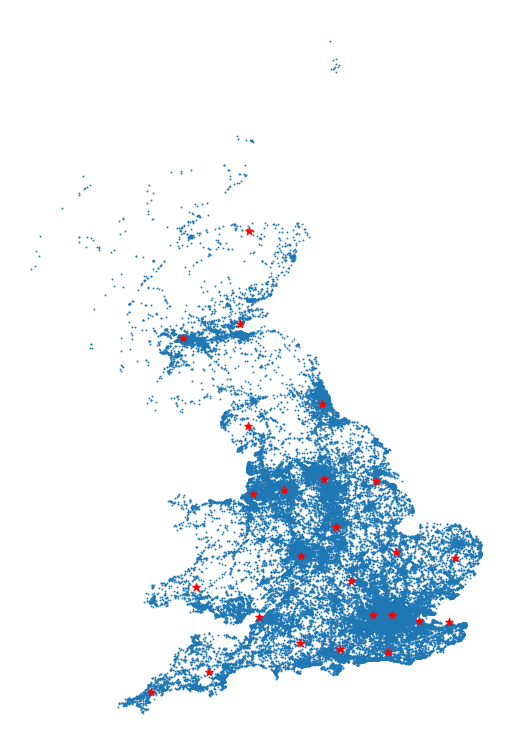

In [133]:
figure(figsize=(8, 12), dpi=80)
plt.scatter(df['longitude'], df['latitude'], s = 0.5)
plt.scatter(x,y, color = 'red',marker = '*', s = 50)
plt.axis('off')
plt.show()

In [134]:
x = pd.DataFrame(df['longitude']).to_numpy()
y = pd.DataFrame(df['latitude']).to_numpy()

In [135]:
k_means = KMeans(n_clusters=25)
k_means.fit(x)
k_means.inertia_


496.7161147921205

In [136]:
from sklearn_extra.cluster import KMedoids

C:\Users\Amro\anaconda3\lib\site-packages\sklearn_extra\cluster\_commonnn.py:18: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(sklearn.__version__) < LooseVersion("0.23.0"):
C:\Users\Amro\anaconda3\lib\site-packages\sklearn_extra\cluster\_commonnn.py:18: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(sklearn.__version__) < LooseVersion("0.23.0"):


In [137]:
x = pd.DataFrame(df[['longitude','latitude']]).to_numpy()

In [138]:
from numpy.random import default_rng
rng = default_rng()
idx = rng.choice(x.shape[0], size=20000, replace= False)
x_small = x[idx]

In [139]:
k_medoids = KMedoids(n_clusters=25)
k_medoids.fit(x_small)

KMedoids(n_clusters=25)

In [140]:
k_medoids.inertia_

6004.617595091766

In [141]:
k_medoids.cluster_centers_

array([[-4.2500200e-01,  5.2153295e+01],
       [-1.5928000e-01,  5.0871030e+01],
       [-1.9292020e+00,  5.2498125e+01],
       [-1.3621350e+00,  5.0895513e+01],
       [-1.2633780e+00,  5.1753862e+01],
       [-3.6409600e-01,  5.3743370e+01],
       [-7.3589300e-01,  5.2025297e+01],
       [ 2.0661400e-01,  5.2177969e+01],
       [-1.2155650e+00,  5.2937285e+01],
       [-9.0267700e-01,  5.2274042e+01],
       [-7.0587700e-01,  5.1341573e+01],
       [ 1.2471780e+00,  5.2507170e+01],
       [-2.0858180e+00,  5.1605279e+01],
       [-1.5298500e+00,  5.3688829e+01],
       [-2.6321970e+00,  5.3490667e+01],
       [-1.8306900e-01,  5.2823593e+01],
       [-9.6290000e-03,  5.1517415e+01],
       [-8.0873700e-01,  5.1755413e+01],
       [-3.8481900e-01,  5.1802210e+01],
       [-1.5378080e+00,  5.4902478e+01],
       [-3.7524780e+00,  5.5964955e+01],
       [-4.1995410e+00,  5.0735358e+01],
       [-2.1236800e-01,  5.1488793e+01],
       [-2.8575320e+00,  5.1440081e+01],
       [ 7.44342

In [142]:
k_medoids.labels_

array([22, 10, 22, ...,  5,  1, 22], dtype=int64)

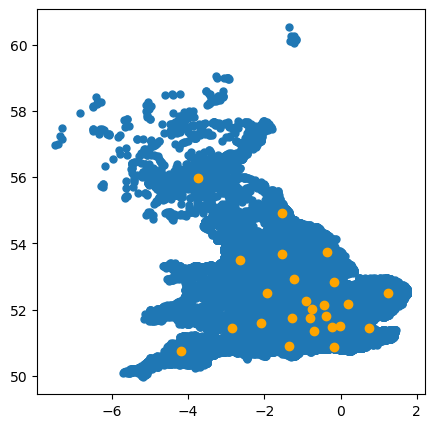

In [143]:
fig = plt.figure(figsize= (5,5))
plt.scatter(df['longitude'], df['latitude'], s = 25)
plt.scatter(k_medoids.cluster_centers_[:,0], 
            k_medoids.cluster_centers_[:,1], 
            color = 'orange')
plt.show()

In [144]:
from sklearn.cluster import DBSCAN

In [145]:
df['time'].unique()

array([16.4 , 13.48, 18.4 , ...,  4.41,  5.11,  4.42])

In [146]:
#pd.set_option('display.max_rows', None)
unique_values = df['time'].unique().tolist()
print(unique_values)

[16.4, 13.48, 18.4, 19.2, 10.4, 17.31, 11.18, 6.5, 15.55, 7.52, 8.44, 16.0, 17.32, 17.03, 14.4, 12.1, 15.4, 17.05, 19.24, 19.1, 10.25, 8.3, 11.49, 12.2, 13.3, 18.3, 14.3, 23.41, 16.57, 15.51, 15.35, 19.27, 10.29, 12.24, 21.23, 19.36, 13.12, 20.26, 15.0, 15.04, 18.0, 14.15, 9.05, 9.2, 16.03, 4.0, 8.35, 16.45, 9.0, 12.15, 18.5, 14.37, 19.05, 7.05, 20.1, 14.53, 7.41, 11.25, 8.15, 0.03, 16.51, 9.04, 17.1, 18.09, 3.15, 16.33, 23.1, 11.3, 7.0, 0.06, 0.45, 13.23, 11.51, 13.28, 23.26, 18.03, 12.14, 12.42, 16.17, 15.3, 10.12, 3.32, 12.12, 8.09, 21.15, 17.12, 19.57, 9.12, 10.53, 6.53, 22.44, 21.29, 20.36, 5.2, 16.18, 18.44, 15.28, 19.29, 10.38, 18.29, 19.5, 23.11, 11.29, 19.12, 14.43, 17.19, 18.24, 13.58, 16.22, 17.07, 22.15, 11.24, 11.57, 13.45, 21.47, 14.41, 17.13, 17.35, 10.3, 17.25, 19.46, 15.05, 18.06, 15.15, 1.35, 17.3, 7.45, 13.15, 1.04, 7.51, 17.08, 10.54, 17.0, 14.0, 18.55, 14.45, 11.0, 18.34, 9.29, 17.4, 14.23, 17.21, 12.5, 8.55, 19.3, 8.43, 15.32, 10.43, 7.2, 9.35, 9.11, 16.39, 8.4, 1

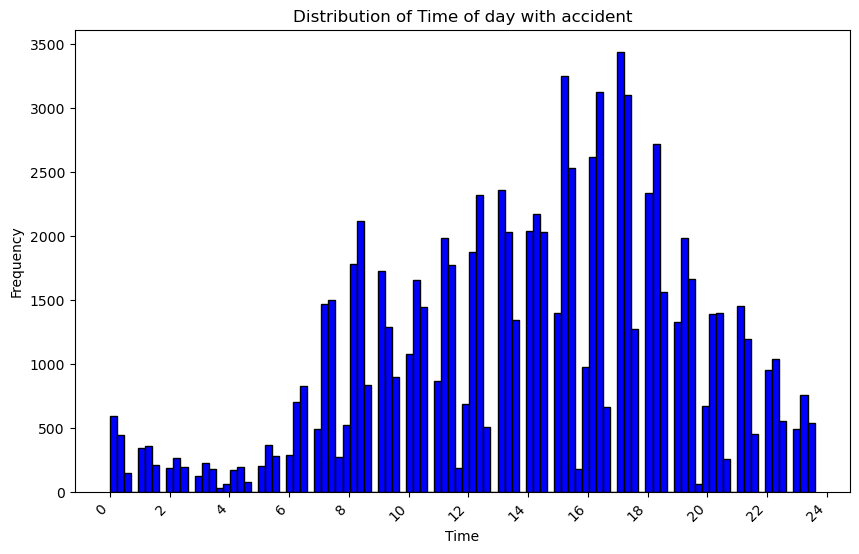

In [147]:
# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(df['time'], bins=100, color='blue', edgecolor='black')
plt.title("Distribution of Time of day with accident")
plt.xlabel("Time")
plt.ylabel("Frequency")

# Increase the number of x-axis ticks for better visibility
plt.xticks(rotation=45, ha='right')
plt.locator_params(axis='x', nbins=20) 

plt.show()


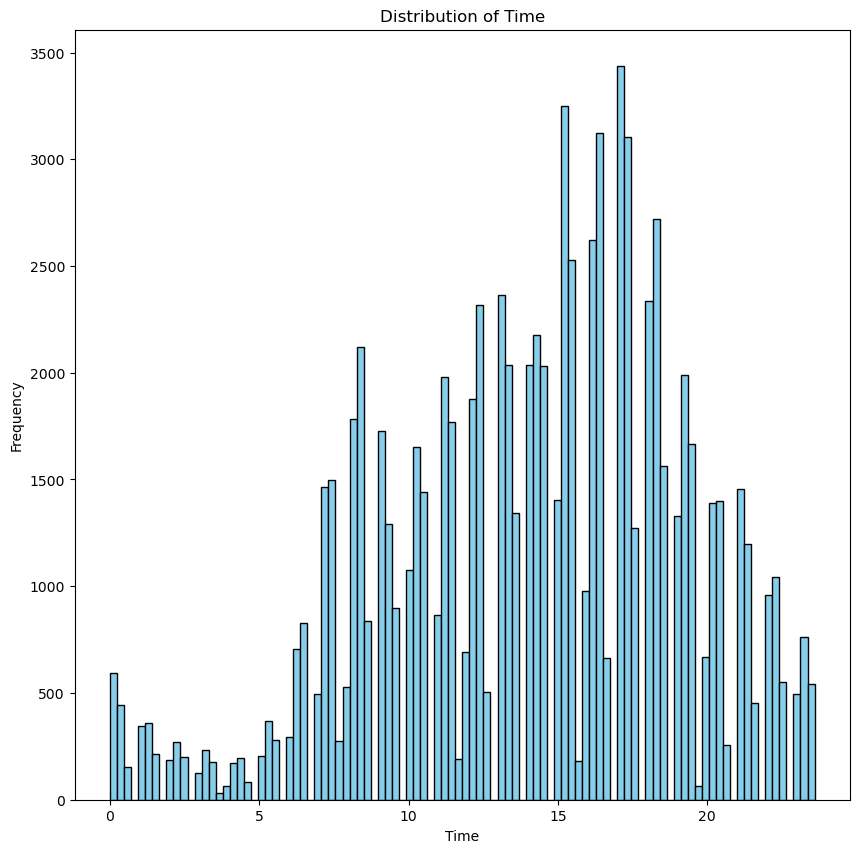

In [148]:
# Plot histogram
plt.figure(figsize=(10,10))
plt.hist(df['time'], bins=100, color='skyblue', edgecolor='black')
plt.title("Distribution of Time")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.show()


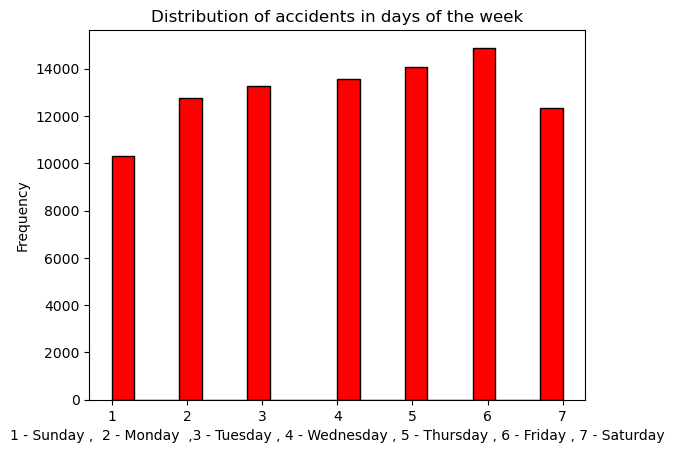

In [150]:
# Plot histogram
plt.hist(df['day_of_week'], bins=20, color='red', edgecolor='black')

# Customize plot
plt.title("Distribution of accidents in days of the week")
plt.xlabel('1 - Sunday ,  2 - Monday  ,3 - Tuesday , 4 - Wednesday , 5 - Thursday , 6 - Friday , 7 - Saturday' , fontsize = 10)
plt.ylabel("Frequency")
plt.show()

In [151]:
df['date']

42738   2020-12-07
80171   2020-04-10
80150   2020-03-09
80134   2020-12-13
80092   2020-08-07
           ...    
89941   2020-05-09
89940   2020-08-21
90969   2020-12-14
87911   2020-01-29
87793   2020-01-28
Name: date, Length: 91197, dtype: datetime64[ns]

In [152]:
# Changing the type of the column date from object to date
df["converted_date"] = df["date"].astype("datetime64")

C:\Users\Amro\AppData\Local\Temp\ipykernel_20864\3454762842.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["converted_date"] = df["date"].astype("datetime64")


In [153]:
df["converted_date"]

42738   2020-12-07
80171   2020-04-10
80150   2020-03-09
80134   2020-12-13
80092   2020-08-07
           ...    
89941   2020-05-09
89940   2020-08-21
90969   2020-12-14
87911   2020-01-29
87793   2020-01-28
Name: converted_date, Length: 91197, dtype: datetime64[ns]

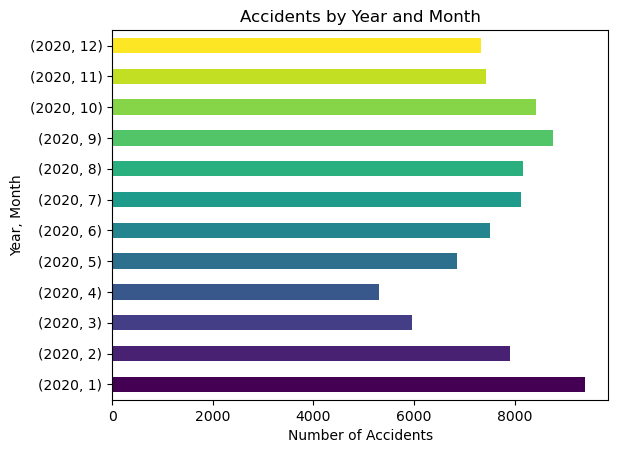

In [154]:
# Group the data by year and month and calculate the size of each group
grouped_data = df.groupby([df["converted_date"].dt.year, df["converted_date"].dt.month]).size()
num_bars = len(grouped_data)

colors = plt.cm.viridis(np.linspace(0, 1, num_bars))
grouped_data.plot(kind="barh", color=colors)
plt.title('Accidents by Year and Month')
plt.xlabel('Number of Accidents')
plt.ylabel('Year, Month')
plt.yticks(rotation=0)
plt.show()


### Outliers detection analysis

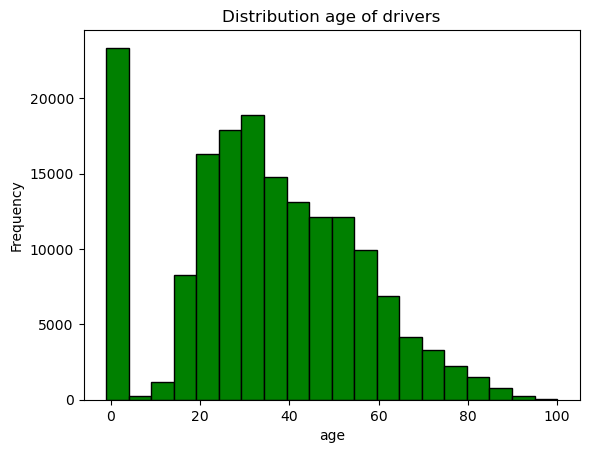

In [155]:
# ploting the age of drivers
plt.hist(df1['age_of_driver'], bins=20, color='green', edgecolor='black')
plt.title("Distribution age of drivers")
plt.xlabel("age")
plt.ylabel("Frequency")
plt.show()

In [156]:
df1['age_of_driver'].value_counts()

-1      23344
 30      5308
 29      3672
 28      3622
 25      3599
        ...  
 97         3
 98         3
 3          2
 99         2
 100        1
Name: age_of_driver, Length: 99, dtype: int64

In [157]:
# Checking for discrepancies in the rows where age of driver is -1 
df[df1['age_of_driver']==-1]

C:\Users\Amro\AppData\Local\Temp\ipykernel_20864\4168185219.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df1['age_of_driver']==-1]


,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,converted_date
80072,2020520100215,2020,520100215,320431.0,126332.0,-3.136071,51.030818,52,3,2,...,4,2,2,0,0,2,1,2,E01032652,2020-08-12
80061,2020520100116,2020,520100116,333049.0,140004.0,-2.958700,51.155351,52,3,4,...,4,5,2,1,0,2,2,2,E01029137,2020-01-10
79986,2020520004712,2020,520004712,354540.0,152332.0,-2.652994,51.268313,52,3,2,...,6,7,2,0,0,2,1,2,E01029056,2020-08-11
80180,2020520100953,2020,520100953,345895.0,153213.0,-2.777034,51.275477,52,3,2,...,1,1,1,0,0,2,2,2,E01029127,2020-10-17
80230,2020520101212,2020,520101212,356570.0,118336.0,-2.619793,50.962793,52,3,1,...,6,2,2,0,0,2,1,2,E01029199,2020-10-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90516,2020990995042,2020,990995042,65947.0,798425.0,-7.497375,56.955941,99,2,2,...,4,1,1,0,0,2,2,-1,-1,2020-10-30
88448,2020990946085,2020,990946085,71500.0,803289.0,-7.412812,57.003413,99,2,1,...,1,1,1,0,0,2,1,-1,-1,2020-04-15
87797,2020990928117,2020,990928117,142184.0,957303.0,-6.418019,58.427716,99,3,1,...,6,1,1,0,0,2,2,-1,-1,2020-06-02
90969,2020991006902,2020,991006902,148990.0,940519.0,-6.283537,58.281358,99,2,1,...,1,1,2,0,2,2,2,-1,-1,2020-12-14


In [158]:
df1['age_of_driver'].value_counts()

-1      23344
 30      5308
 29      3672
 28      3622
 25      3599
        ...  
 97         3
 98         3
 3          2
 99         2
 100        1
Name: age_of_driver, Length: 99, dtype: int64

In [159]:
df1['age_of_driver'].mode()

0   -1
Name: age_of_driver, dtype: int64

In [160]:
df1['age_of_driver'].mean()

34.50965795369679

In [161]:
df1['age_of_driver'].median()

34.0

In [162]:
q75, q25 = np.percentile(df1['age_of_driver'], [75,25])
iqr = q75-q25
print(iqr)

27.0


In [163]:
print(q25-3*iqr, q75+3*iqr)

-59.0 130.0


In [164]:
print(q25-1.5*iqr, q75+1.5*iqr)

-18.5 89.5


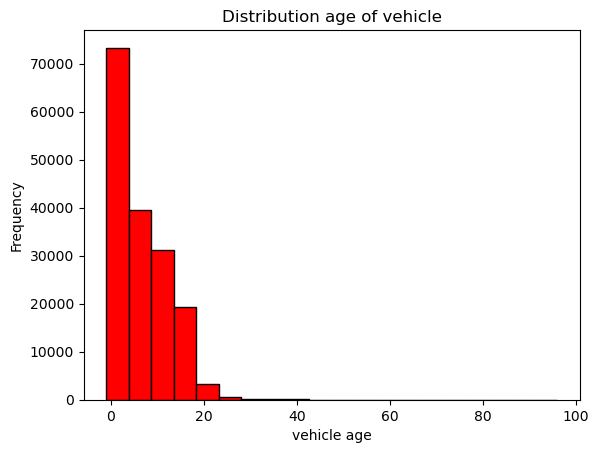

In [166]:
# Ploting a ditribution for the age of the vehicle
plt.hist(df1['age_of_vehicle'], bins=20, color='red', edgecolor='black')
plt.title("Distribution age of vehicle")
plt.xlabel("vehicle age")
plt.ylabel("Frequency")
plt.show()

In [167]:
df1['age_of_vehicle'].value_counts()

-1     43072
 1      9310
 4      9260
 5      8746
 3      8512
       ...  
 66        1
 84        1
 92        1
 62        1
 93        1
Name: age_of_vehicle, Length: 75, dtype: int64

In [168]:
df1['age_of_vehicle'].mode()

0   -1
Name: age_of_vehicle, dtype: int64

In [169]:
df1['age_of_vehicle'].median()

5.0

In [170]:
df1['age_of_vehicle'].mean()

5.820600448095593

In [171]:
#df1['age_of_vehicle'].replace(-1,5.0, inplace=True)

In [172]:
from scipy import stats
from sklearn.neighbors import LocalOutlierFactor

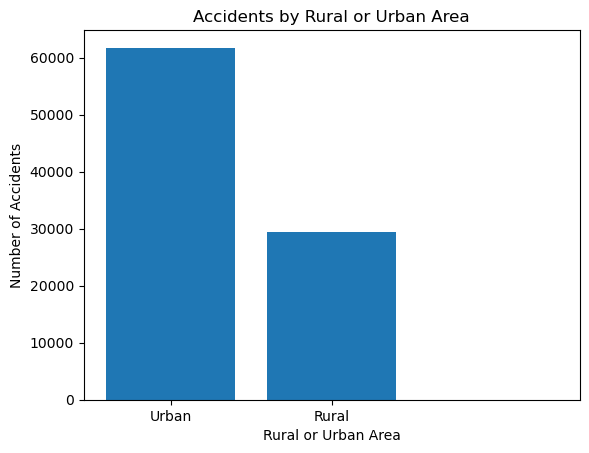

In [173]:
# Grouping the data frame by urban and rural column counting the number of accidents
accident_count = df.groupby("urban_or_rural_area")["accident_index"].count()

# Plotting a bar chart
plt.bar(accident_count.index, accident_count.values)
plt.xticks([1, 2], ["Urban", "Rural"]) 
plt.xlabel("Rural or Urban Area") 
plt.ylabel("Number of Accidents") 
plt.title("Accidents by Rural or Urban Area") 
plt.show() 


C:\Users\Amro\AppData\Local\Temp\ipykernel_20864\950387718.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["label"] = y


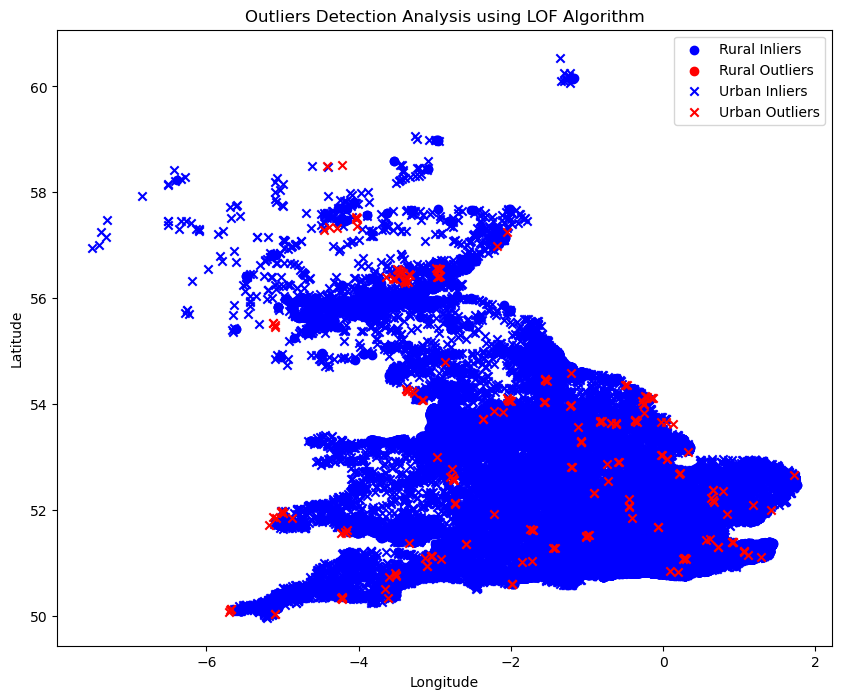

In [174]:
# Create and fit the LocalOutlierFactor model
lof_model = LocalOutlierFactor(contamination=0.0025)
X = df[["longitude", "latitude"]]
y = lof_model.fit_predict(X)

df["label"] = y

plt.figure(figsize=(10, 8))
colors = {1: "blue", -1: "red"}
markers = {1: "o", 2: "x"}

# Plot each category of data points using a loop
for area_type in [1, 2]:
    for label in [1, -1]:
        filtered_df = df[(df["urban_or_rural_area"] == area_type) & (df["label"] == label)]
        plt.scatter(filtered_df["longitude"], filtered_df["latitude"], c=colors[label], marker=markers[area_type], label=f"{('Rural', 'Urban')[area_type-1]} {('Inliers', 'Outliers')[label == -1]}")


plt.title("Outliers Detection Analysis using LOF Algorithm")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.savefig("outliers_plot.png")
plt.show()

### Analysis of the Pedestrian accidents

In [300]:
# Using SQL to query the pedestrian accident and joining the casualty table and accident table
res = cur.execute("""
    SELECT casualty.casualty_class, 
    casualty.age_of_casualty,
    casualty.pedestrian_location,
    age_band_of_casualty,
    accident.time,
    accident.day_of_week
    FROM casualty
    JOIN accident ON casualty.accident_index = accident.accident_index
    WHERE accident.accident_year = 2020 AND casualty.casualty_class = 3;
""")
rows1 = res.fetchall()


In [301]:
df5 = pd.DataFrame(rows1,columns=['Casualty_class','age_of_casualty','age_band_of_casualty','Day','Time','pedestrian_location'])
df5

,Casualty_class,age_of_casualty,age_band_of_casualty,Day,Time,pedestrian_location
0,3,31,9,6,09:00,3
1,3,2,1,1,13:55,2
2,3,4,1,1,13:55,2
3,3,23,5,5,01:25,4
4,3,47,4,8,01:50,4
...,...,...,...,...,...,...
14745,3,54,8,8,10:30,3
14746,3,58,5,9,17:00,2
14747,3,69,6,10,12:00,3
14748,3,63,10,9,15:05,6


In [302]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14750 entries, 0 to 14749
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Casualty_class        14750 non-null  int64 
 1   age_of_casualty       14750 non-null  int64 
 2   age_band_of_casualty  14750 non-null  int64 
 3   Day                   14750 non-null  int64 
 4   Time                  14750 non-null  object
 5   pedestrian_location   14750 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 691.5+ KB


In [303]:
df5['age_of_casualty'].value_counts()

 11    502
 12    450
 13    379
 14    319
-1     278
      ... 
 92     11
 95      8
 94      5
 96      4
 98      2
Name: age_of_casualty, Length: 99, dtype: int64

In [304]:
# Drop rows with -1 in age of casualty column
df5 = df5[df5['age_of_casualty'] != -1]

In [305]:
# Drop rows with -1 in pedestrian location column
df5 = df5[df5['age_of_casualty'] != -1]

In [306]:
# Convert the day column to numeric
#df5['Day'] = pd.to_numeric(df5['Day'])

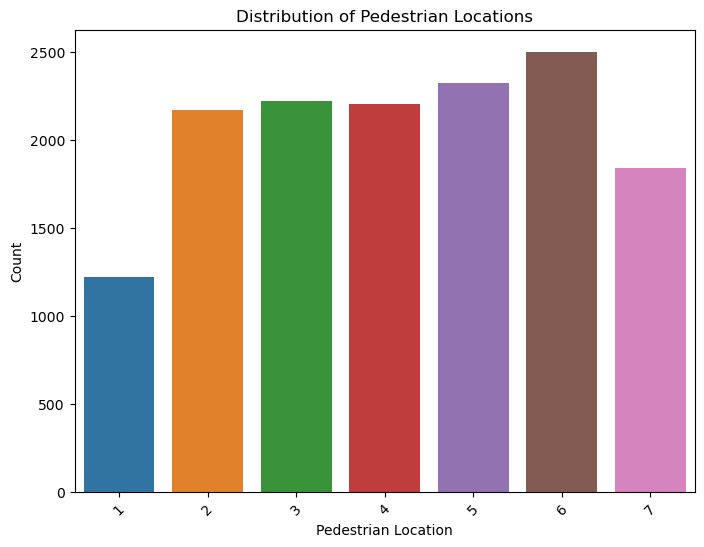

In [307]:
# Pedestrian Location Distribution (Bar Plot)
pedestrian_location_counts = df5['pedestrian_location'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=pedestrian_location_counts.index, y=pedestrian_location_counts.values)
plt.xlabel('Pedestrian Location')
plt.ylabel('Count')
plt.title('Distribution of Pedestrian Locations')
plt.xticks(rotation=45)
plt.show()

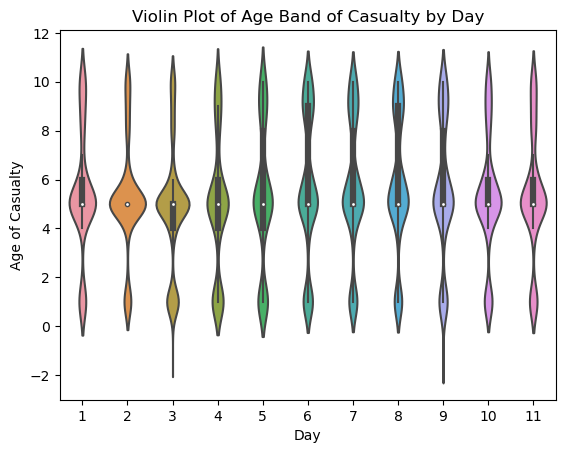

In [308]:
# Plot the violin plot
sns.violinplot(data=df5, x='Day', y='age_band_of_casualty')
plt.xlabel('Day')
plt.ylabel('Age of Casualty')
plt.title('Violin Plot of Age Band of Casualty by Day')
plt.show()


C:\Users\Amro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


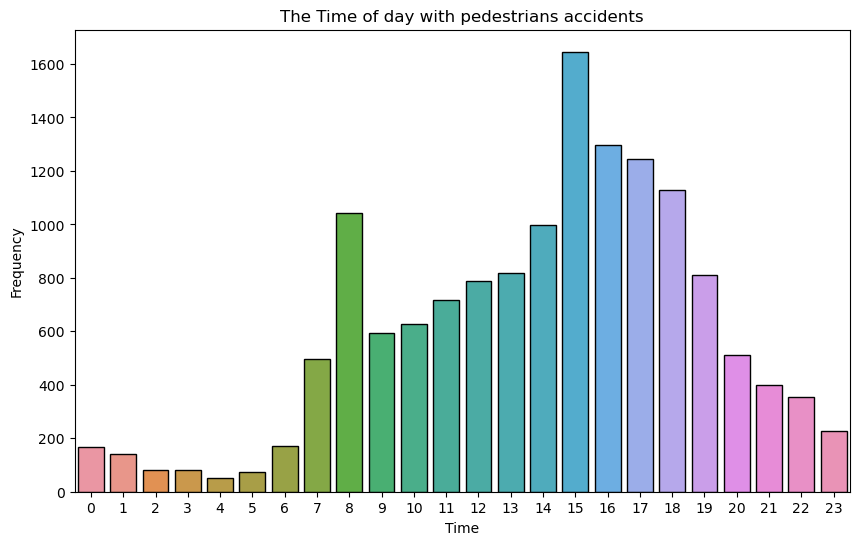

In [310]:
# Convert the "Time" column to datetime format
df5['Time'] = pd.to_datetime(df5['Time'], format='%H:%M')
df5['Hour'] = df5['Time'].dt.hour

# Histogram for the time of day with the accidents involving pedestrians
plt.figure(figsize=(10, 6))
sns.countplot(df5['Hour'], edgecolor='black')  
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('The Time of day with pedestrians accidents')
plt.xticks(range(0, 24))  
plt.show()


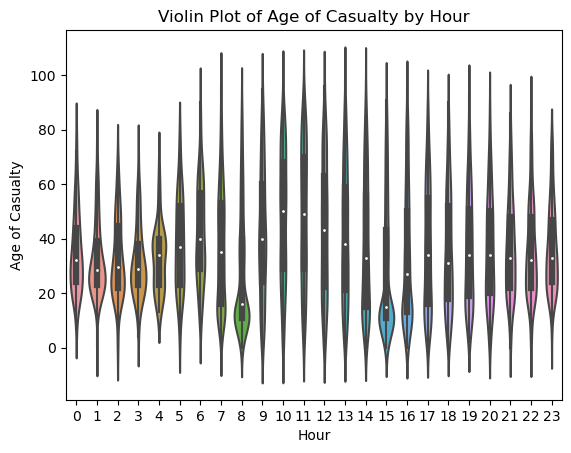

In [311]:
# Plot the violin plot
sns.violinplot(data=df5, x='Hour', y='age_of_casualty')
plt.xlabel('Hour')
plt.ylabel('Age of Casualty')
plt.title('Violin Plot of Age of Casualty by Hour')
plt.show()


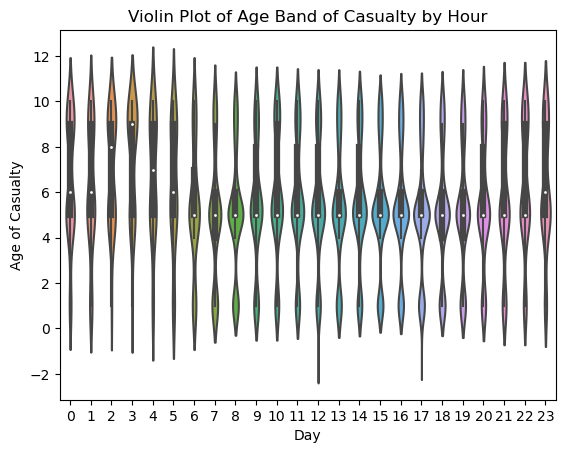

In [312]:
# Plot the violin plot
sns.violinplot(data=df5, x='Hour', y='age_band_of_casualty')
plt.xlabel('Day')
plt.ylabel('Age of Casualty')
plt.title('Violin Plot of Age Band of Casualty by Hour')
plt.show()


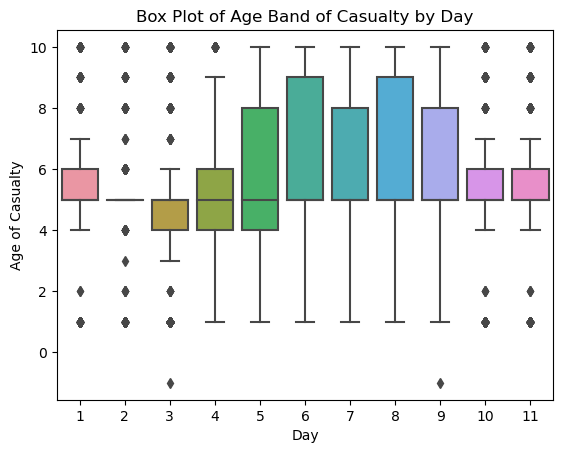

In [314]:
# Plot the box plot
sns.boxplot(data=df5, x='Day', y='age_band_of_casualty')
plt.xlabel('Day')
plt.ylabel('Age of Casualty')
plt.title('Box Plot of Age Band of Casualty by Day')
plt.show()


### Analysis of the motorcycle accidents 

In [180]:
res = cur.execute("""
    SELECT vehicle.vehicle_type, accident.time, accident.day_of_week, accident.junction_detail
    FROM vehicle
    JOIN accident ON accident.accident_index = vehicle.accident_index
    WHERE accident.accident_year = 2020 AND vehicle.vehicle_type IN (02, 03, 04, 05);
""")
rows2 = res.fetchall()


In [181]:
df6 = pd.DataFrame(rows2,columns=['Motorcycle_Type','Time_of_Day', 'Day_of_Week','junction_detail'])
df6

,Motorcycle_Type,Time_of_Day,Day_of_Week,junction_detail
0,3,03:25,4,6
1,2,08:00,4,3
2,3,14:00,4,0
3,3,14:37,4,0
4,3,19:05,4,3
...,...,...,...,...
14121,3,16:30,5,0
14122,3,17:30,4,8
14123,3,17:55,2,7
14124,4,15:45,5,3


C:\Users\Amro\anaconda3\lib\site-packages\seaborn\categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < "3.0":
C:\Users\Amro\anaconda3\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


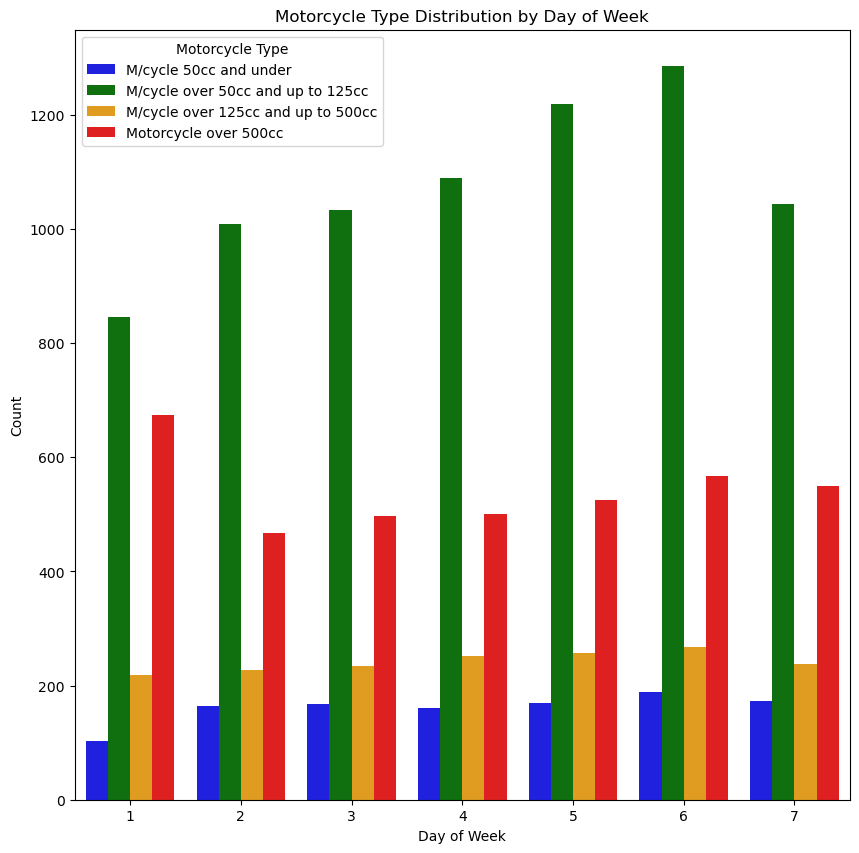

In [183]:
motorcycle_colors = {2: 'blue', 3: 'green', 4: 'orange', 5:'red'}
plt.figure(figsize=(10,10))
sns.countplot(x='Day_of_Week', hue='Motorcycle_Type', data=df6, palette=motorcycle_colors)
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.title('Motorcycle Type Distribution by Day of Week')
plt.legend(title='Motorcycle Type', loc='upper left', labels=['M/cycle 50cc and under', 'M/cycle over 50cc and up to 125cc','M/cycle over 125cc and up to 500cc','Motorcycle over 500cc'])  
plt.savefig('motorcycle_type_distribution.png')
plt.show()

In [186]:
# Converting the time of day from object type
df6['Time_of_Day'] = pd.to_datetime(df6['Time_of_Day'], format='%H:%M')
df6['Hours'] = df6['Time_of_Day'].dt.hour

C:\Users\Amro\anaconda3\lib\site-packages\seaborn\categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < "3.0":
C:\Users\Amro\anaconda3\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


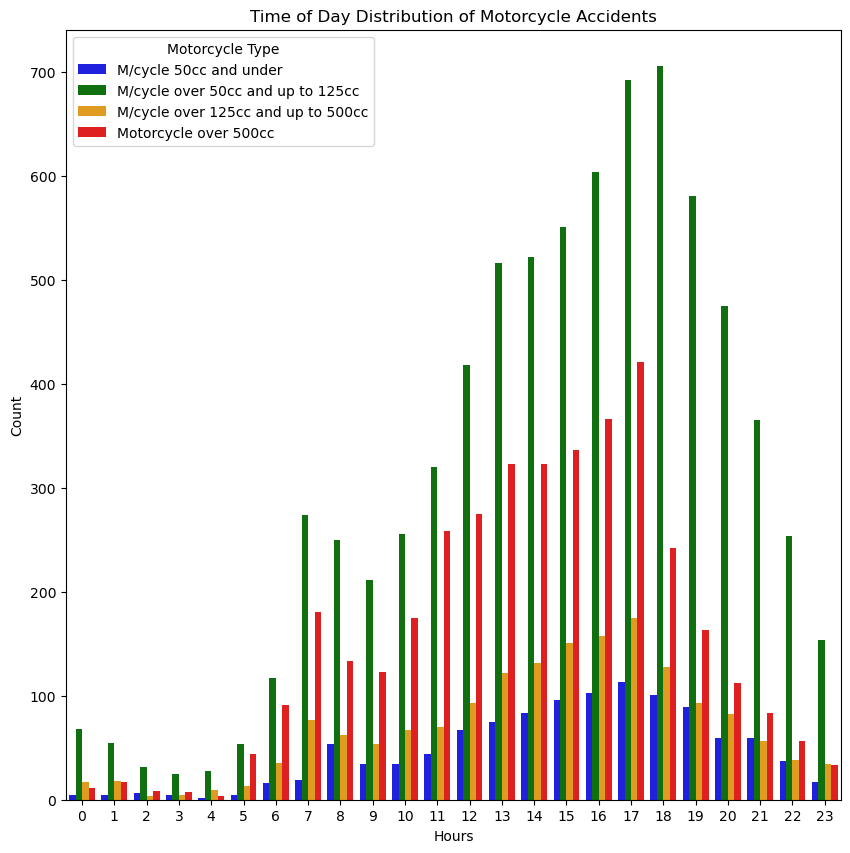

In [187]:
motorcycle_colors = {2: 'blue', 3: 'green', 4: 'orange', 5: 'red'}
# Plotting the figure using countplot to compare motorcycle types
plt.figure(figsize=(10, 10))
sns.countplot(x='Hours', hue='Motorcycle_Type', data=df6, palette=motorcycle_colors)
plt.xlabel('Hours')
plt.ylabel('Count')
plt.title('Time of Day Distribution of Motorcycle Accidents')
plt.legend(title='Motorcycle Type', loc='upper left', labels=[
    'M/cycle 50cc and under', 'M/cycle over 50cc and up to 125cc',
    'M/cycle over 125cc and up to 500cc', 'Motorcycle over 500cc'
])
plt.savefig('motorcycle_type_distribution.png')
plt.show()


C:\Users\Amro\anaconda3\lib\site-packages\seaborn\categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < "3.0":
C:\Users\Amro\anaconda3\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


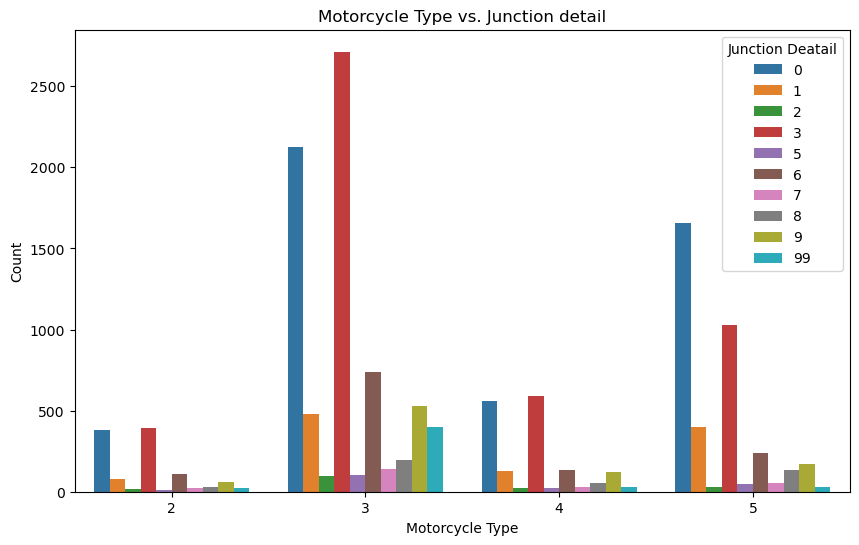

In [184]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df6, x='Motorcycle_Type', hue='junction_detail')
plt.title('Motorcycle Type vs. Junction detail')
plt.xlabel('Motorcycle Type')
plt.ylabel('Count')
plt.legend(title='Junction Deatail')
plt.show()


In [185]:
df6['junction_detail'].value_counts()

3     4721
0     4720
6     1222
1     1092
9      882
99     488
8      411
7      245
5      184
2      161
Name: junction_detail, dtype: int64

### Clustering of accidents in the Region of Hull

In [210]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

C:\Users\Amro\AppData\Local\Temp\ipykernel_20864\1819661814.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_df['cluster'] = kmeans_model.fit_predict(coordinates_df)


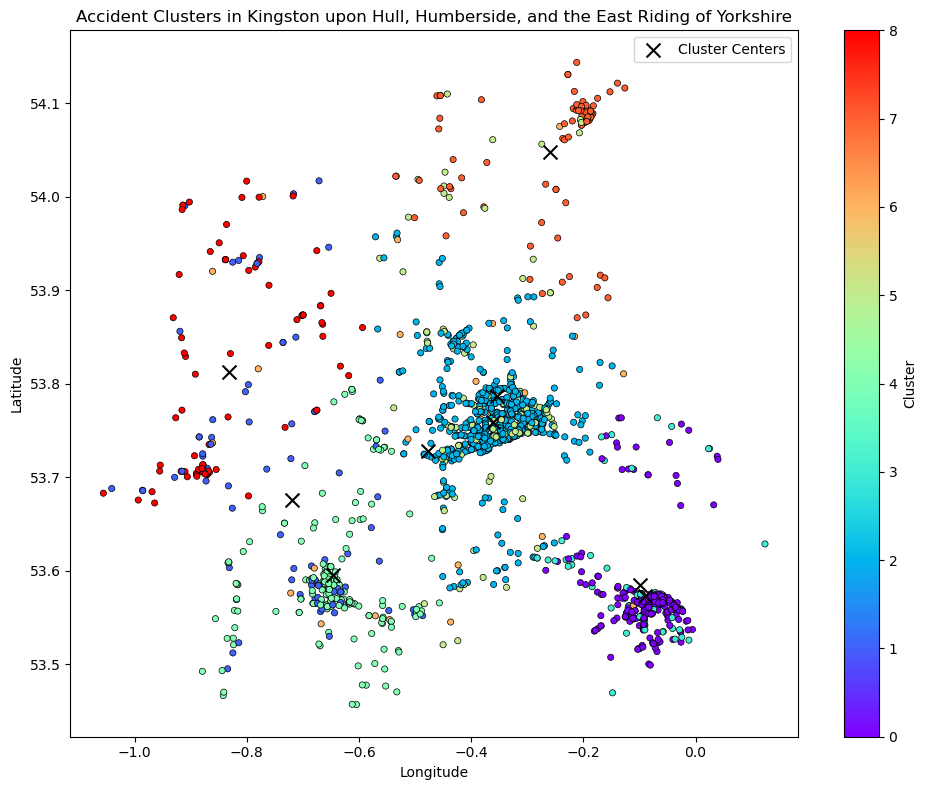

Cluster Distribution:
2    703
0    261
4    208
5    174
8     89
7     87
1     83
3     72
6     32
Name: cluster, dtype: int64


In [211]:
# Filtering the data for the region of interest (police_force == 16)
region_df = df[df['police_force'] == 16]

# Selecting the relevant columns for clustering 
coordinates_df = region_df[['latitude', 'longitude','accident_severity']]

# Fit KMeans clustering model
num_clusters = 9
kmeans_model = KMeans(n_clusters=num_clusters, random_state=42)
region_df['cluster'] = kmeans_model.fit_predict(coordinates_df)
cluster_centers = kmeans_model.cluster_centers_

# Plotting the clusters on a scatter plot with improved color visibility
plt.figure(figsize=(10, 8))
scatter = plt.scatter(region_df['longitude'], region_df['latitude'], c=region_df['cluster'], cmap='rainbow', s=20, edgecolors='k', linewidths=0.5)
plt.scatter(cluster_centers[:, 1], cluster_centers[:, 0], c='black', marker='x', s=100, label='Cluster Centers')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Accident Clusters in Kingston upon Hull, Humberside, and the East Riding of Yorkshire')
plt.colorbar(scatter, label='Cluster')
plt.legend()
plt.tight_layout()
plt.savefig('Clustering of accidents in the region of Hull.png')
plt.show()

cluster_distribution = region_df['cluster'].value_counts()
print("Cluster Distribution:")
print(cluster_distribution)


In [212]:
silhouette_avg = silhouette_score(coordinates_df, region_df['cluster'])
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.6241813710422536


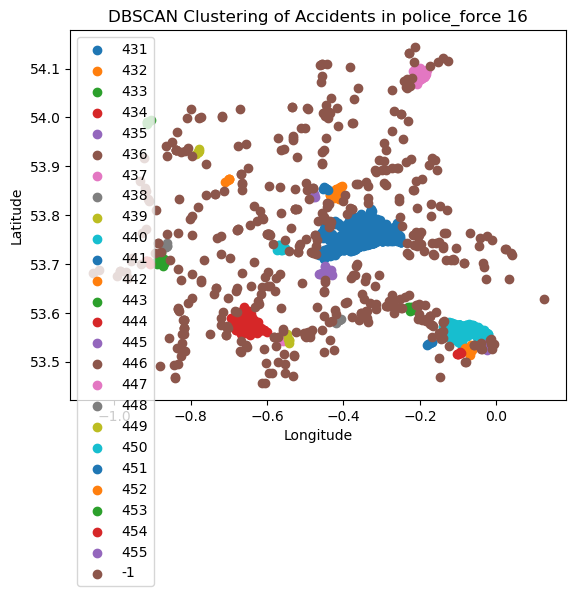

In [204]:
longitude = df["longitude"].values
latitude = df["latitude"].values
police_force = df["police_force"].values

dbscan = DBSCAN(eps=0.01, min_samples=5)
labels = dbscan.fit_predict(np.column_stack((longitude, latitude,police_force)))
clustered_df = df.assign(cluster=labels)

filtered_df = clustered_df.loc[clustered_df["police_force"] == 16]

for cluster in set(filtered_df["cluster"].values):
    points = filtered_df.loc[filtered_df["cluster"] == cluster, ["longitude", "latitude"]]
    plt.scatter(points["longitude"], points["latitude"], label=str(cluster))

plt.title("DBSCAN Clustering of Accidents in police_force 16")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.show()


### Classification Models

In [213]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree

In [214]:
df['accident_severity'].unique()

array([2, 3, 1], dtype=int64)

In [215]:
df['accident_severity'].value_counts()

3    71451
2    18355
1     1391
Name: accident_severity, dtype: int64

In [216]:
# Setting the boolean conditions 
labels=df['accident_severity']==1

In [217]:
labels.value_counts()

False    89806
True      1391
Name: accident_severity, dtype: int64

In [218]:
# balancing the data
X = df
X,Y = RandomUnderSampler().fit_resample(X,labels)

In [219]:
Y.value_counts()

False    1391
True     1391
Name: accident_severity, dtype: int64

In [220]:
# Selecting the features for target and training 
Y_target = Y
X_features = X.drop(['accident_severity','did_police_officer_attend_scene_of_accident'], axis=1)
X_features = X_features.select_dtypes([np.number]) 

In [221]:
# Using a selector to select the best scoring features
selector = SelectKBest (f_classif, k=10)
x=selector.fit(X_features , Y_target)
X_selected = selector.transform(X_features)

C:\Users\Amro\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Amro\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [222]:
mask = selector.get_support()
names = selector.feature_names_in_[mask]
scores = selector.scores_[mask]

In [223]:
X_features = X[names]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

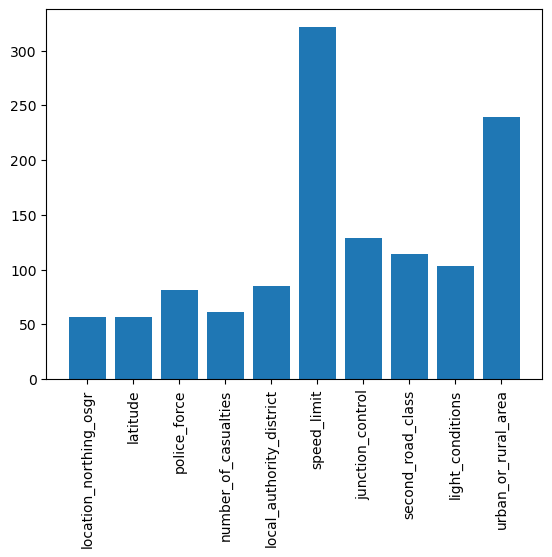

In [224]:
#plotting the top features selected
plt.bar(names, scores)
plt.xticks(rotation= 'vertical')

In [226]:
# Splitting the data for training and testing
X_features = X_features.drop(['location_northing_osgr'],axis=1)
x_train, x_test, y_train, y_test = train_test_split (X_features,Y_target, test_size=0.25, random_state=42)

In [234]:
dtree = DecisionTreeClassifier (criterion = 'gini')
dtree.fit(x_train, y_train)

In [236]:
y_pred = dtree.predict(x_test)
acc_dtree = round(dtree.score(x_train, y_train)* 100*2)

<AxesSubplot:>

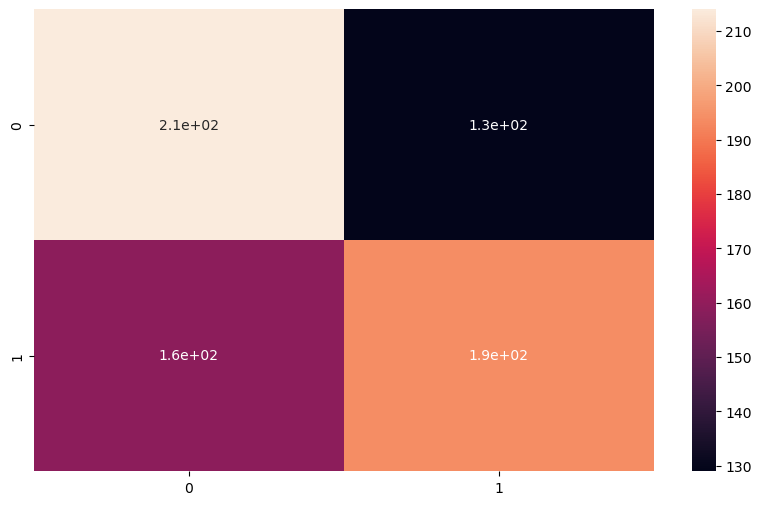

In [256]:
# Evaluating the decision tree model
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True)

In [257]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.57      0.62      0.60       343
        True       0.60      0.55      0.57       353

    accuracy                           0.59       696
   macro avg       0.59      0.59      0.59       696
weighted avg       0.59      0.59      0.59       696



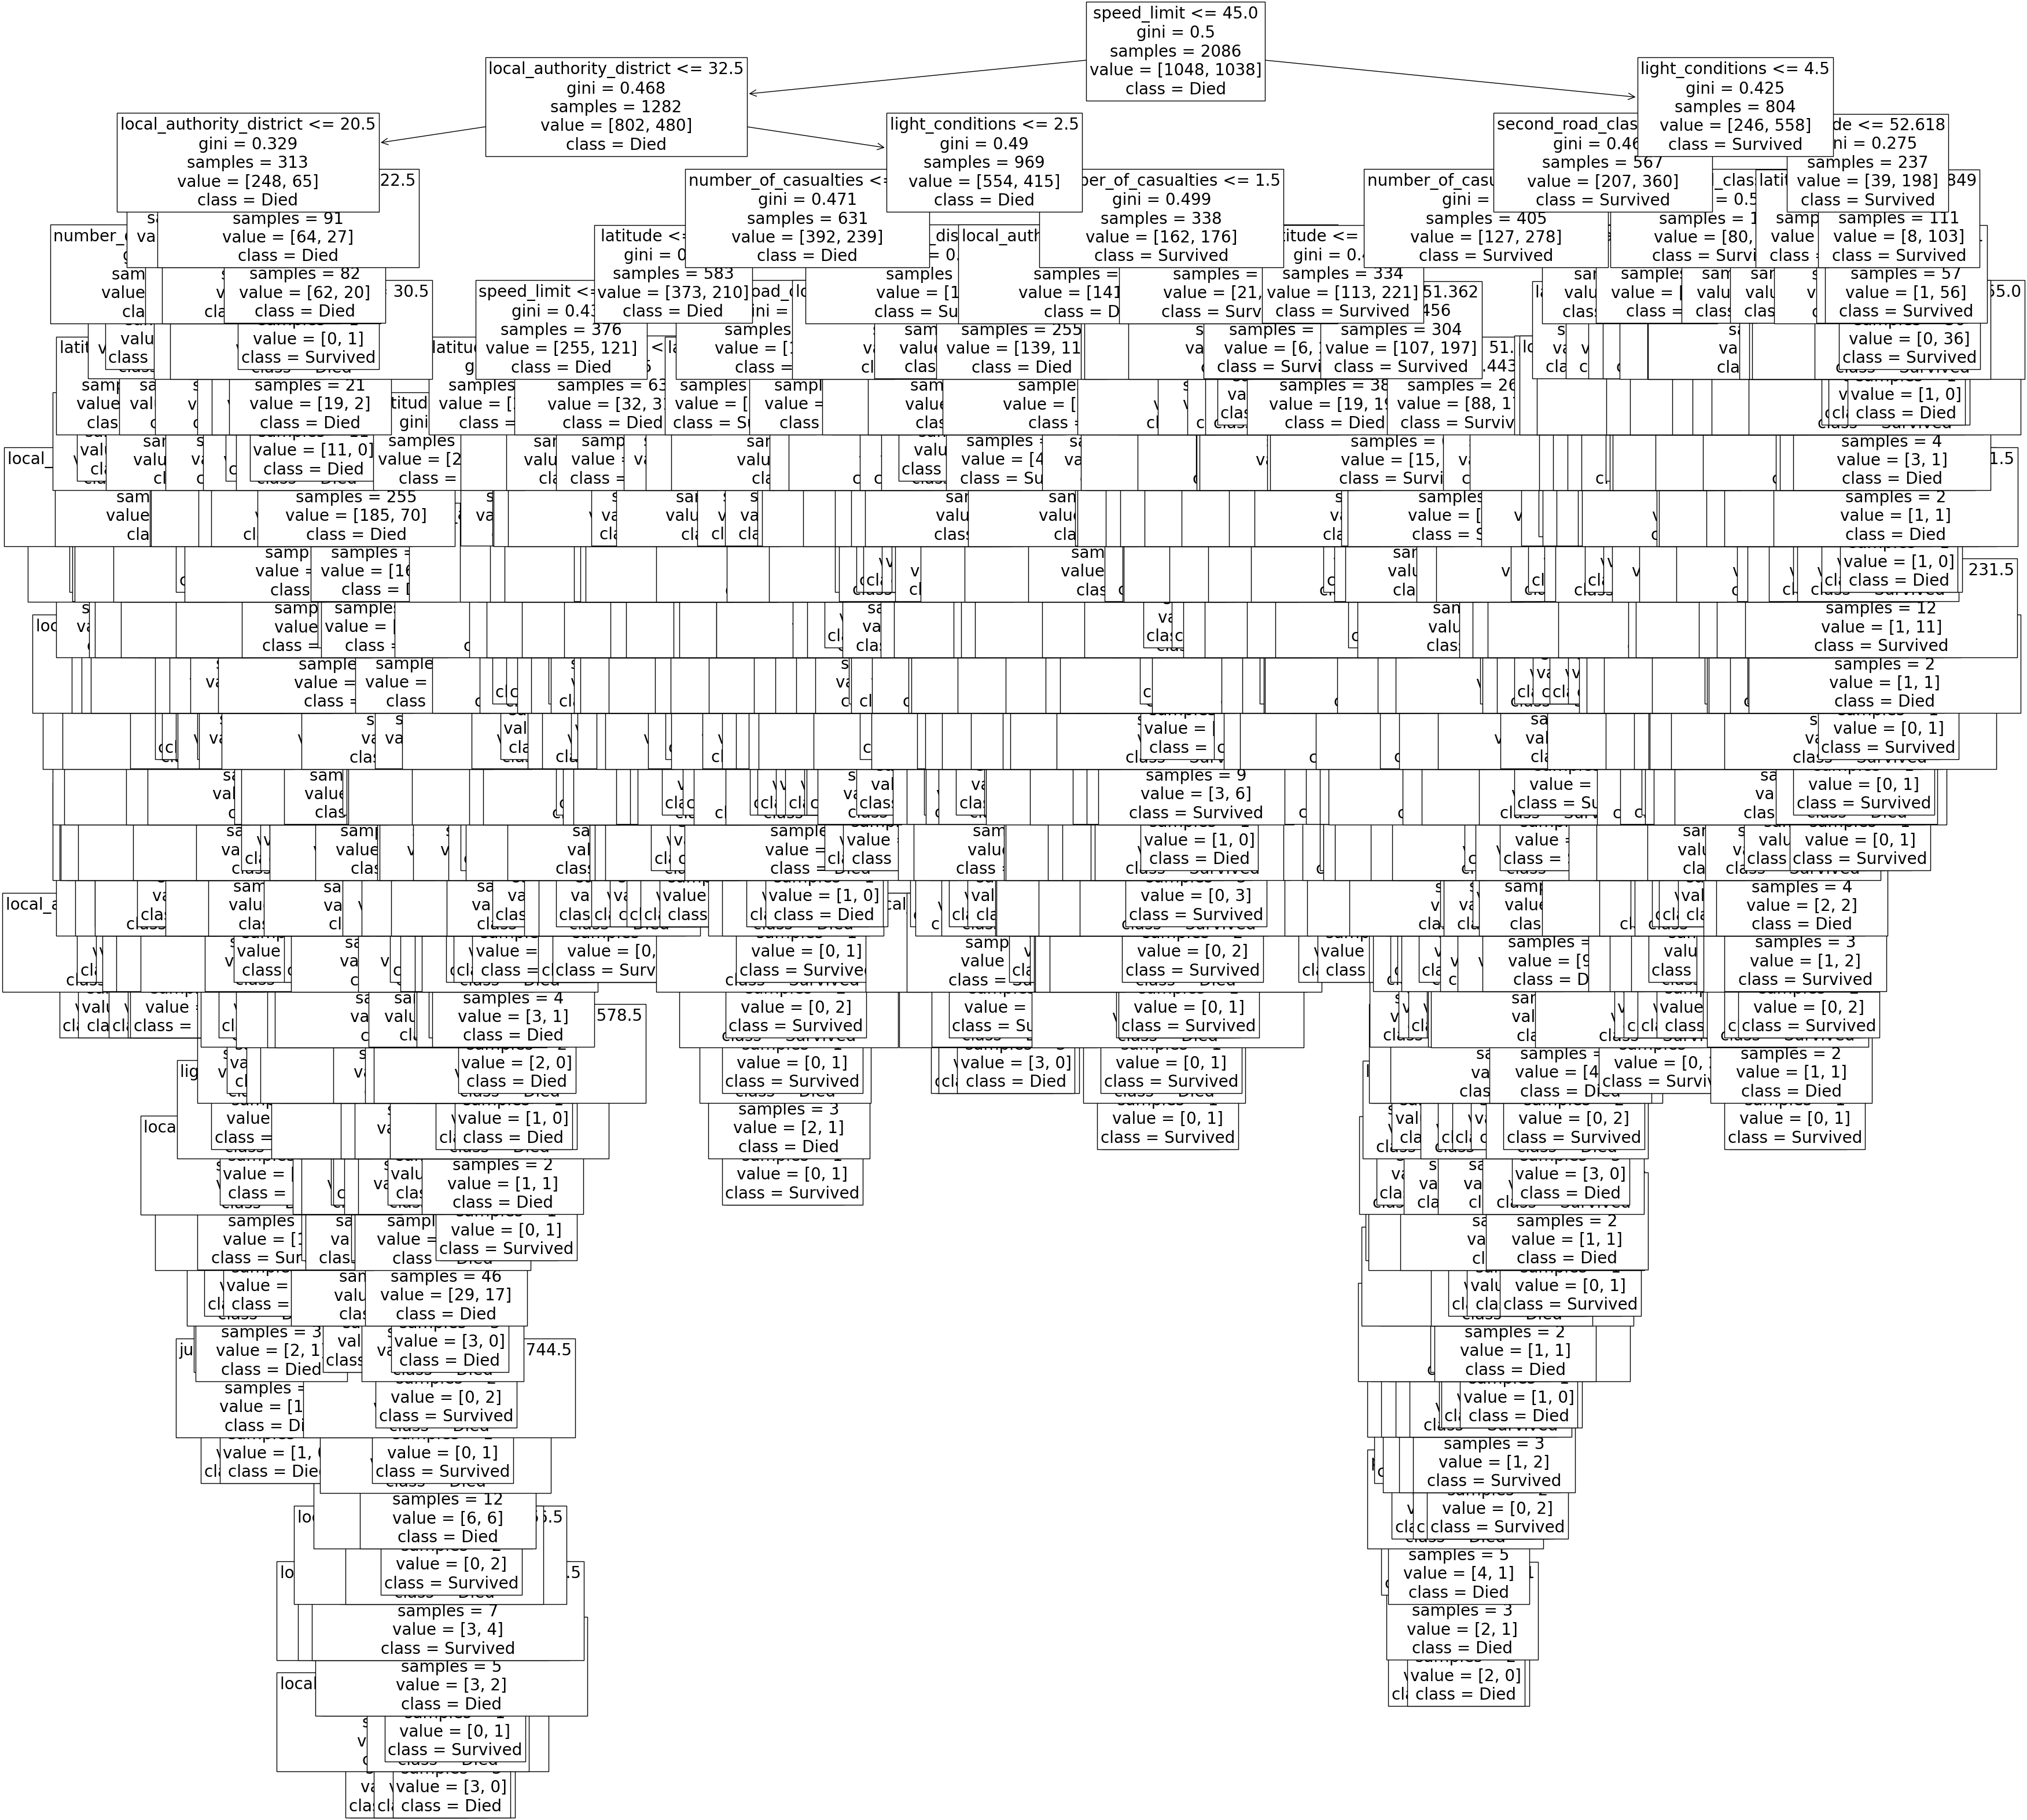

In [279]:
# plotting the features selection criteria 
plt.figure(figsize=(40, 40))
plot_tree(dtree, feature_names=X_features.columns, class_names=["Died", "Survived"], fontsize=20)
plt.show()

In [272]:
from numpy import mean, std
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier

In [280]:
# Functions with the all the different classifier models (adopted from the workshop week 10)
def get_models():
    models = dict()
    models['dtree'] = DecisionTreeClassifier()
    models['knn'] = KNeighborsClassifier()
    models['bayes'] = GaussianNB()
    models['svm'] = SVC()
    models['rf'] = RandomForestClassifier()
    models['gb'] = GradientBoostingClassifier()
    return models

In [287]:
# Functions to evaluate the different models performance (adopted from the workshop week 10)
def evaluate_model(model, x, y):
    cv = RepeatedStratifiedKFold(
            n_splits=10,
            n_repeats=3,
            random_state=1
        )
    scores = cross_val_score(
                model, x, y,
                scoring='accuracy',
                cv=cv, error_score='raise'
        )
    return scores

In [282]:
models = get_models()

In [288]:
# The different model accuracy evaluation
names = []
results = []
for name, model in models.items():
    scores = evaluate_model(model, x_train, y_train)
    print(f"{name}: {scores.mean():3.2f} ({scores.std():.3f})")
    names.append(name)
    results.append(scores)

dtree: 0.59 (0.030)


C:\Users\Amro\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Amro\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

C:\Users\Amro\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Amro\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

knn: 0.64 (0.033)
bayes: 0.66 (0.030)
svm: 0.65 (0.024)
rf: 0.64 (0.031)
gb: 0.66 (0.027)


In [284]:
# Functions to stack the different classifier (adopted from workshop10)
def get_stacking():
    level0= []
    level0.append(('dtree',DecisionTreeClassifier()))
    level0.append(('knn', KNeighborsClassifier()))
    level0.append(('bayes', GaussianNB()))
    level0.append(('svm', SVC()))
    level0.append(('rf', RandomForestClassifier()))
    level1 = LogisticRegression()
    
    model = StackingClassifier(estimators = level0, final_estimator=level1, cv=5)
    return model

In [285]:
# satcking the different classifiers 
stacking_model = get_stacking()
stacking_model.fit(x_train, y_train)
accuracy = stacking_model.score(x_test, y_test)
print(f"Stacking Model Accuracy: {accuracy:.2f}")



Stacking Model Accuracy: 0.68


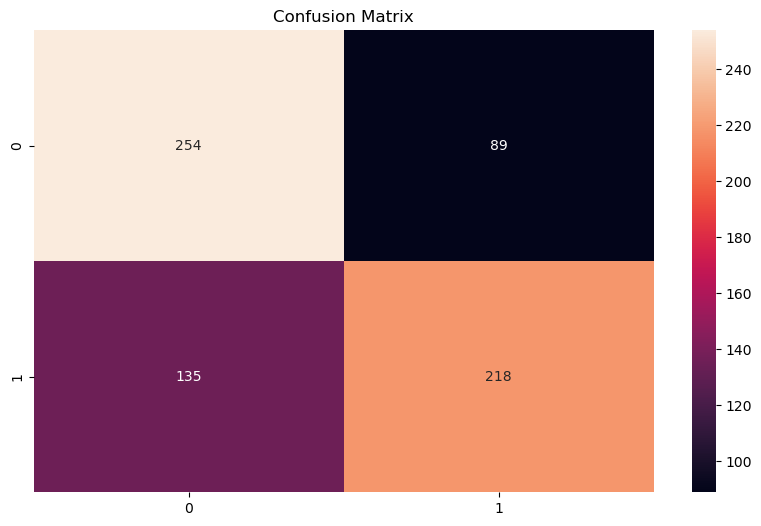

Classification Report:
              precision    recall  f1-score   support

       False       0.65      0.74      0.69       343
        True       0.71      0.62      0.66       353

    accuracy                           0.68       696
   macro avg       0.68      0.68      0.68       696
weighted avg       0.68      0.68      0.68       696



In [286]:
# Evaluation of stacking model performance
y_pred = stacking_model.predict(x_test)

plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred))
